<a href="https://colab.research.google.com/github/cete03/LAIDD/blob/main/%5BSTEP_2%5D_3D_Descriptor_%EC%83%9D%EC%84%B1_%2B_XGBoost_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive 연결하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 필요한 library 다운로드하기

In [2]:
!pip install rdkit

import os
from rdkit import Chem
from rdkit.Chem import AllChem
import subprocess #이 모듈이 있으면 외부에 있는 software를 돌려서 output을 만들 수 있다.
# 이 subprocess를 통해서 MOPAC을 돌리고자 함.
import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 67.4 MB/s eta 0:00:00


# MOPAC 업로드하기

In [3]:
from google.colab import files
uploaded = files.upload()

Saving mopac-23.1.2-linux.tar.gz to mopac-23.1.2-linux.tar.gz


In [4]:
!tar -xvzf mopac-23.1.2-linux.tar.gz

mopac-23.1.2-linux/bin/
mopac-23.1.2-linux/bin/mopac
mopac-23.1.2-linux/bin/mopac-makpol
mopac-23.1.2-linux/bin/mopac-param
mopac-23.1.2-linux/include/
mopac-23.1.2-linux/include/mopac.h
mopac-23.1.2-linux/lib/
mopac-23.1.2-linux/lib/libmopac.so
mopac-23.1.2-linux/lib/libmopac.so.2
mopac-23.1.2-linux/CITATION.cff
mopac-23.1.2-linux/LICENSE
mopac-23.1.2-linux/include/LICENSE
mopac-23.1.2-linux/include/mopac_wrapper.F90
mopac-23.1.2-linux/include/mopac_wrapper_internal.F90
mopac-23.1.2-linux/lib/libiomp5.so


In [5]:
!ls -l

total 8508
drwx------ 5 root root    4096 Oct 23 04:38 drive
drwxr-xr-x 5 root root    4096 Oct 23 04:39 mopac-23.1.2-linux
-rw-r--r-- 1 root root 8696604 Oct 23 04:39 mopac-23.1.2-linux.tar.gz
drwxr-xr-x 1 root root    4096 Oct 21 16:52 sample_data


In [6]:
!ls -l mopac-23.1.2-linux/bin/

total 1092
-rwxr-xr-x 1 root root   31968 Feb 17  2025 mopac
-rwxr-xr-x 1 root root 1051040 Feb 17  2025 mopac-makpol
-rwxr-xr-x 1 root root   31968 Feb 17  2025 mopac-param


In [7]:
!chmod +x mopac-23.1.2-linux/bin/mopac

# Openbarbel 다운로드

In [ ]:
!pip install openbabel-wheel
from openbabel import pybel
import openbabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 59.0 MB/s eta 0:00:00


In [ ]:
rightnow = datetime.datetime.now().strftime('%y%m%d%H%M%S')
#그것을 계산한 날짜가 파일 이름이 되도록 한다.

wdir = r'/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/'
if not os.path.exists(wdir):
    os.makedirs(wdir)

# 3D Descriptor 계산하기

In [ ]:
import pandas as pd
import os
import subprocess
from tqdm import tqdm

# ================================================
# qm_parsing 함수를 먼저 정의합니다.
# ================================================
def qm_parsing(outfile):
    qm_desc = {}
    for each_line in outfile:
        if 'FINAL HEAT OF FORMATION' in each_line:
            hof = each_line.split()
            qm_desc['hof'] = hof[5]
        elif 'HOMO LUMO ENERGIES' in each_line:
            mo = each_line.split()
            qm_desc['homo'] = mo[-2]
            qm_desc['lumo'] = mo[-1]
        elif 'COSMO AREA' in each_line:
            area_data = each_line.split()
            qm_desc['cosmo_area'] = area_data[-2]
        elif 'COSMO VOLUME' in each_line:
            volume_data = each_line.split()
            qm_desc['cosmo_volume'] = volume_data[-2]
    return qm_desc


In [ ]:
# .mop 파일이 저장된 폴더 경로를 지정합니다.
mop_dir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/mop'

# 원본 CSV 파일을 불러와 df_original에 할당합니다.
wdir2 = r'/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/'
csv = 'DILIRANK_WO_M(수정본3).csv'
df = pd.read_csv(os.path.join(wdir2, csv))
df_original = df[~df['SMILES'].isna()]

In [ ]:
# Add execute permission to the mopac executable file
# The command you ran before made the directory executable, not the file inside
!chmod +x mopac-23.1.2-linux/bin/mopac

subprocess.run(["./mopac-23.1.2-linux/bin/mopac", os.path.join(mop_dir, rightnow+'.mop')])

## 3D Descriptor parsing하기

In [ ]:
import pandas as pd
import os
import subprocess
from tqdm import tqdm

# ================================================
# qm_parsing 함수를 먼저 정의합니다.
# ================================================
def qm_parsing(outfile):
    qm_desc = {}
    for each_line in outfile:
        if 'FINAL HEAT OF FORMATION' in each_line:
            hof = each_line.split()
            qm_desc['hof'] = hof[5]
        elif 'HOMO LUMO ENERGIES' in each_line:
            mo = each_line.split()
            qm_desc['homo'] = mo[-2]
            qm_desc['lumo'] = mo[-1]
        elif 'COSMO AREA' in each_line:
            area_data = each_line.split()
            qm_desc['cosmo_area'] = area_data[-2]
        elif 'COSMO VOLUME' in each_line:
            volume_data = each_line.split()
            qm_desc['cosmo_volume'] = volume_data[-2]
    return qm_desc

# ================================================
# 1. 파일 경로 및 변수 설정 (Colab 경로로 수정)
# ================================================
# MOPAC 실행 파일의 전체 경로를 지정합니다.
# .mop 파일이 저장된 폴더 경로를 지정합니다.
mop_dir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/mop'

# 원본 CSV 파일을 불러와 df_original에 할당합니다.
wdir2 = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터/'
csv = 'DILIRANK_WO_M(수정본3).csv'
df = pd.read_csv(os.path.join(wdir2, csv))
df_original = df[~df['SMILES'].isna()]

# ================================================
# 2. .mop 파일을 찾아 MOPAC 계산 실행
# ================================================
# .mop 파일 목록을 가져옵니다.
mop_files = [f for f in os.listdir(mop_dir) if f.endswith('.mop')]

# 결과를 저장할 빈 리스트를 만듭니다.
qm_results = []

# tqdm을 사용하여 진행 상황을 표시합니다.
# 기존 코드의 for 루프 내부에 추가
for idx, mop_file in tqdm(enumerate(mop_files), total=len(mop_files), desc="MOPAC Calculations"):
    # MOPAC에 전달할 파일 경로를 만듭니다.
    input_filepath = os.path.join(mop_dir, mop_file)

    # .mop 파일명에서 인덱스를 추출합니다.
    try:
        index = int(mop_file.replace('.mop', ''))
    except ValueError:
        continue

    # ================================================
    # 3. MOPAC 프로그램 실행 (수정된 부분)
    # ================================================
    # 'wsl'을 제거하고 올바른 변수명을 사용합니다.
    process = subprocess.run(
        ["./mopac-23.1.2-linux/bin/mopac", input_filepath],
        capture_output=True,
        text=True,
        check=False
    )

    # ================================================
    # 4. MOPAC 출력 파일(.out) 파싱
    # ================================================
    output_filepath = os.path.join(mop_dir, mop_file.replace('.mop', '.out'))

    if os.path.exists(output_filepath):
        with open(output_filepath, 'r') as f:
            output_content = f.readlines()

        qm_desc = qm_parsing(output_content)

        if index in df_original.index:
            row_data = df_original.loc[index].to_dict()
            row_data.update(qm_desc)
            qm_results.append(row_data)

         # 50개 분자마다 중간 결과를 저장 (필요에 따라 횟수 조절)
    if (idx + 1) % 50 == 0:
        intermediate_df = pd.DataFrame(qm_results)
        intermediate_df.to_csv(os.path.join(mop_dir, "dilirank_qm_intermediate.csv"), index=False)
        print(f"\n{idx + 1}개 분자 계산 완료. 중간 결과가 저장되었습니다.")

    else:
        print(f"MOPAC 계산 오류: {mop_file}")
        print(f"오류 메시지: {process.stderr}")

# ================================================
# 5. 최종 데이터프레임 생성 및 저장
# ================================================
final_df = pd.DataFrame(qm_results)
final_df.to_csv(os.path.join(mop_dir, "dilirank_qm.csv"), index=False)
print(f"계산이 완료되었고, '{os.path.join(mop_dir, 'dilirank_qm.csv')}' 파일로 저장되었습니다.")

.out 파일을 먼저 만들기.
# STEP 1. 단계 1: 데이터 로딩 및 준비

In [8]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 구글 드라이브 경로 설정
base_dir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터'
wdir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터'
csv_file = 'DILIRANK_WO_M(수정본3).csv'
qm_csv_file = 'dilirank_qm.csv'

# 기존 데이터셋과 MOPAC 계산 결과 데이터셋 불러오기
df_original = pd.read_csv(os.path.join(base_dir, csv_file))
df_qm = pd.read_csv(os.path.join(wdir, qm_csv_file))

# 데이터셋 병합
# qm_results는 인덱스를 기준으로 데이터를 추가했으므로, 인덱스 기준으로 병합합니다.
final_df = pd.merge(df_original, df_qm, how='inner', on='Unnamed: 0', suffixes=('', '_qm'))

# 중복 열 제거 및 필요한 열만 선택
final_df = final_df.loc[:,~final_df.columns.duplicated()]

# 최종 데이터 확인
print("최종 데이터셋의 열 목록:")
print(final_df.columns)

최종 데이터셋의 열 목록:
Index(['Unnamed: 0', 'SMILES', 'Severity Class', 'vDILIConcern', 'SMILES_qm',
       'Severity Class_qm', 'vDILIConcern_qm', 'hof', 'cosmo_area',
       'cosmo_volume', 'homo', 'lumo'],
      dtype='object')


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         905 non-null    int64  
 1   SMILES             905 non-null    object 
 2   Severity Class     905 non-null    int64  
 3   vDILIConcern       905 non-null    object 
 4   SMILES_qm          905 non-null    object 
 5   Severity Class_qm  905 non-null    int64  
 6   vDILIConcern_qm    905 non-null    object 
 7   hof                884 non-null    float64
 8   cosmo_area         884 non-null    object 
 9   cosmo_volume       884 non-null    object 
 10  homo               861 non-null    float64
 11  lumo               861 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 85.0+ KB


In [10]:
final_df.head()

,Unnamed: 0,SMILES,Severity Class,vDILIConcern,SMILES_qm,Severity Class_qm,vDILIConcern_qm,hof,cosmo_area,cosmo_volume,homo,lumo
0,0,Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1,7,Ambiguous DILI-concern,Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1,7,Ambiguous DILI-concern,9.76047,SQUARE,CUBIC,-8.628,-0.493
1,1,CN(C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,3,Ambiguous DILI-concern,CN(C)CCc1c[nH]c2ccc(C[C@H]3COC(=O)N3)cc12,3,Ambiguous DILI-concern,-51.56700,SQUARE,CUBIC,-8.531,-0.393
2,2,CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(...,3,Ambiguous DILI-concern,CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(...,3,Ambiguous DILI-concern,-236.99428,SQUARE,CUBIC,-7.905,0.124
3,3,C=CC(N)CCC(=O)O,2,Ambiguous DILI-concern,C=CC(N)CCC(=O)O,2,Ambiguous DILI-concern,-83.62122,SQUARE,CUBIC,-9.621,0.805
4,4,C=Cc1c(C)c2cc3nc(cc4[nH]c(cc5nc(cc1[nH]2)C(C)=...,3,Ambiguous DILI-concern,C=Cc1c(C)c2cc3nc(cc4[nH]c(cc5nc(cc1[nH]2)C(C)=...,3,Ambiguous DILI-concern,-200.47597,SQUARE,CUBIC,-7.698,-1.690


In [11]:
# 1. 데이터프레임의 기본 정보 확인
print("--- 데이터프레임 기본 정보 ---")
final_df.info()

# 2. 각 열의 고유한 값 개수 확인
print("\n--- 각 열의 고유한 값 개수 ---")
print(final_df.nunique())

# 3. 특정 열의 모든 고유한 값 확인
print("\n--- 'cosmo_area' 열의 모든 고유한 값 ---")
print(final_df['cosmo_area'].unique())

--- 데이터프레임 기본 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         905 non-null    int64  
 1   SMILES             905 non-null    object 
 2   Severity Class     905 non-null    int64  
 3   vDILIConcern       905 non-null    object 
 4   SMILES_qm          905 non-null    object 
 5   Severity Class_qm  905 non-null    int64  
 6   vDILIConcern_qm    905 non-null    object 
 7   hof                884 non-null    float64
 8   cosmo_area         884 non-null    object 
 9   cosmo_volume       884 non-null    object 
 10  homo               861 non-null    float64
 11  lumo               861 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 85.0+ KB

--- 각 열의 고유한 값 개수 ---
Unnamed: 0           905
SMILES               905
Severity Class         9
vDILIConcern           4
SMILES_qm       

# STEP 2: 특성(Feature) 및 목표 변수(Target) 설정

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
# 목표 변수(Target)인 'vDILIConcern'을 인코딩
le = LabelEncoder()
final_df['vDILIConcern_encoded'] = le.fit_transform(final_df['vDILIConcern'])

# 특성(X)과 목표 변수(y) 정의
# X에 사용할 특성 열들을 선택하세요.
# 예: QM 기술자들과 기존 2D 기술자들
feature_cols = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']

# NaN(결측값) 처리: 모델에 따라 다르지만, 여기서는 평균값으로 대체
for col in feature_cols:
    if col in final_df.columns:
        final_df[col] = pd.to_numeric(final_df[col], errors='coerce')
        final_df[col].fillna(final_df[col].mean(), inplace=True)
    else:
        print(f"경고: 특성 열 '{col}'이 데이터프레임에 존재하지 않습니다.")

X = final_df[feature_cols]
y = final_df['vDILIConcern_encoded']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/tmp/ipython-input-947430088.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[col].fillna(final_df[col].mean(), inplace=True)


In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            905 non-null    int64  
 1   SMILES                905 non-null    object 
 2   Severity Class        905 non-null    int64  
 3   vDILIConcern          905 non-null    object 
 4   SMILES_qm             905 non-null    object 
 5   Severity Class_qm     905 non-null    int64  
 6   vDILIConcern_qm       905 non-null    object 
 7   hof                   905 non-null    float64
 8   cosmo_area            0 non-null      float64
 9   cosmo_volume          0 non-null      float64
 10  homo                  905 non-null    float64
 11  lumo                  905 non-null    float64
 12  vDILIConcern_encoded  905 non-null    int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 92.0+ KB


# [1] vDILIConcern 4개로 분류 모델 만들기

## XGBoost

- 단계 3: 모델 구축 및 평가

1) XGBoost 모델
XGBoost는 다중 클래스 분류를 위해 objective='multi:softmax'를 사용합니다.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:45:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost 모델 성능 지표 ===
정확도 (Accuracy): 0.3702

--- 클래스별 상세 지표 ---
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.33      0.33      0.33        45
    vLess-DILI-Concern       0.36      0.42      0.39        50
    vMost-DILI-Concern       0.26      0.22      0.24        36
      vNo-DILI-Concern       0.49      0.46      0.47        50

              accuracy                           0.37       181
             macro avg       0.36      0.36      0.36       181
          weighted avg       0.37      0.37      0.37       181



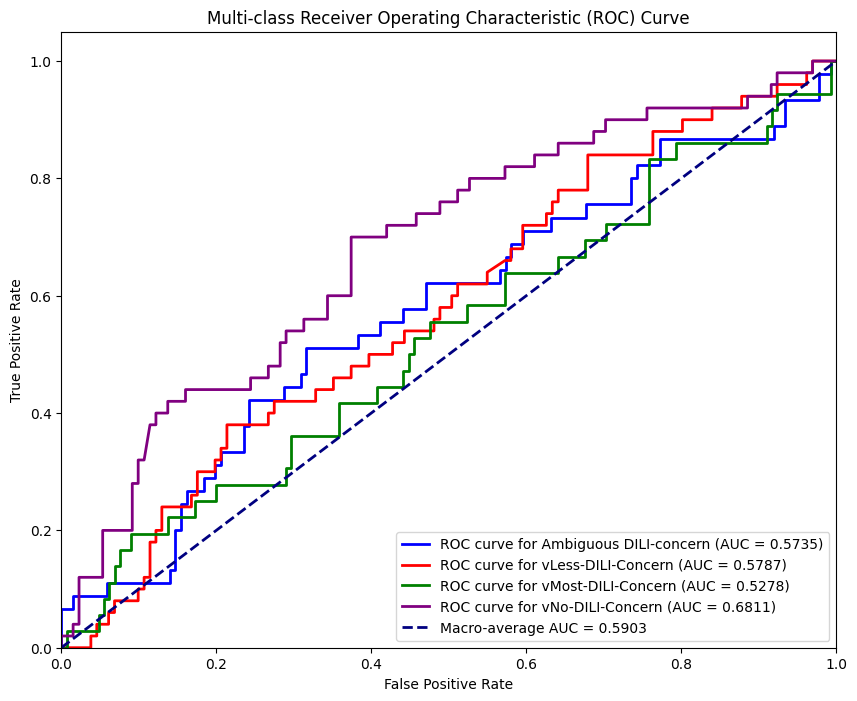

매크로 평균 AUC: 0.5903


In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# 목표 변수(Target)인 'vDILIConcern'을 인코딩
le = LabelEncoder()
final_df['vDILIConcern_encoded'] = le.fit_transform(final_df['vDILIConcern'])
target_names = le.classes_ # 클래스 이름 저장

# 특성(X)과 목표 변수(y) 정의
feature_cols = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']
for col in feature_cols:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')
    final_df[col] = final_df[col].fillna(final_df[col].mean())

X = final_df[feature_cols]
y = final_df['vDILIConcern_encoded']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='merror',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 모델 예측
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)


# 1. Accuracy, Precision, Recall, F1-Score 계산 및 출력
print("=== XGBoost 모델 성능 지표 ===")
print(f"정확도 (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\n--- 클래스별 상세 지표 ---")
print(classification_report(y_test, y_pred, target_names=target_names))


# 2. 다중 클래스 AUC 계산 및 ROC 커브 시각화
# y_test를 One-Hot Encoding하여 ROC 계산에 사용
y_test_onehot = pd.get_dummies(y_test).to_numpy()

# 각 클래스별 ROC 계산 및 시각화
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple']
aucs = []

for i in range(len(target_names)):
    # i번째 클래스에 대한 ROC 커브 계산
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # ROC 커브 그래프 그리기
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve for {target_names[i]} (AUC = {roc_auc:.4f})')

# 매크로 평균 AUC 계산 및 시각화
macro_auc = np.mean(aucs)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=f'Macro-average AUC = {macro_auc:.4f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"매크로 평균 AUC: {macro_auc:.4f}")

## MLP 모델 (신경망)
MLP는 스케일링에 민감하므로 StandardScaler를 사용해 데이터를 표준화해야 합니다.

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


모델 학습 시작...
Epoch [50/500], Loss: 1.3430
Epoch [100/500], Loss: 1.3371
Epoch [150/500], Loss: 1.3323
Epoch [200/500], Loss: 1.3299
Epoch [250/500], Loss: 1.3196
Epoch [300/500], Loss: 1.3236
Epoch [350/500], Loss: 1.3169
Epoch [400/500], Loss: 1.3136
Epoch [450/500], Loss: 1.3154
Epoch [500/500], Loss: 1.3155

=== PyTorch MLP 모델 성능 지표 ===
정확도 (Accuracy): 0.3536

--- 클래스별 상세 지표 ---
                        precision    recall  f1-score   support

Ambiguous DILI-concern       0.29      0.16      0.20        45
    vLess-DILI-Concern       0.32      0.38      0.35        50
    vMost-DILI-Concern       0.35      0.22      0.27        36
      vNo-DILI-Concern       0.40      0.60      0.48        50

              accuracy                           0.35       181
             macro avg       0.34      0.34      0.33       181
          weighted avg       0.34      0.35      0.33       181



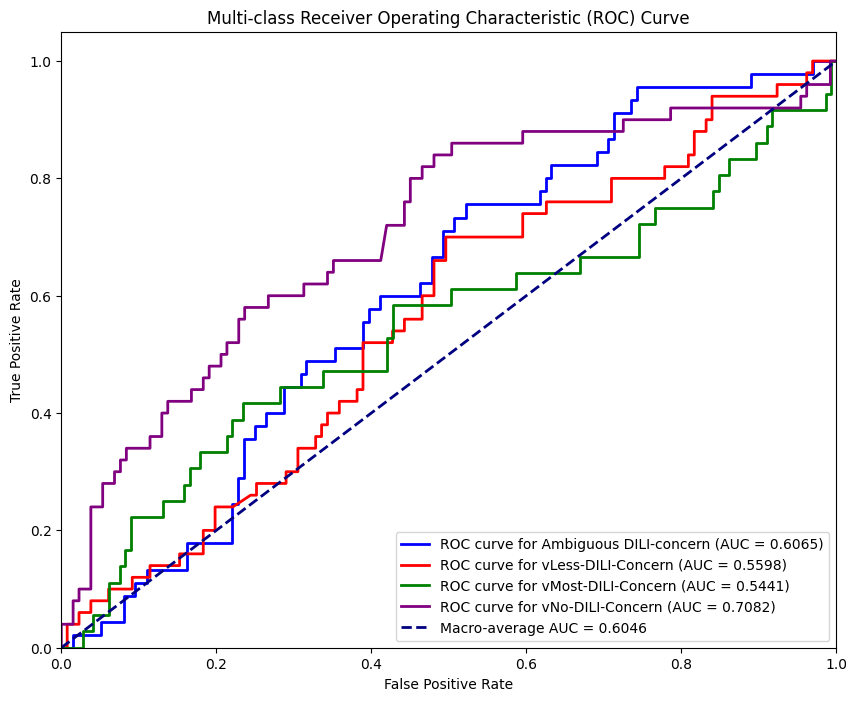


매크로 평균 AUC: 0.6046


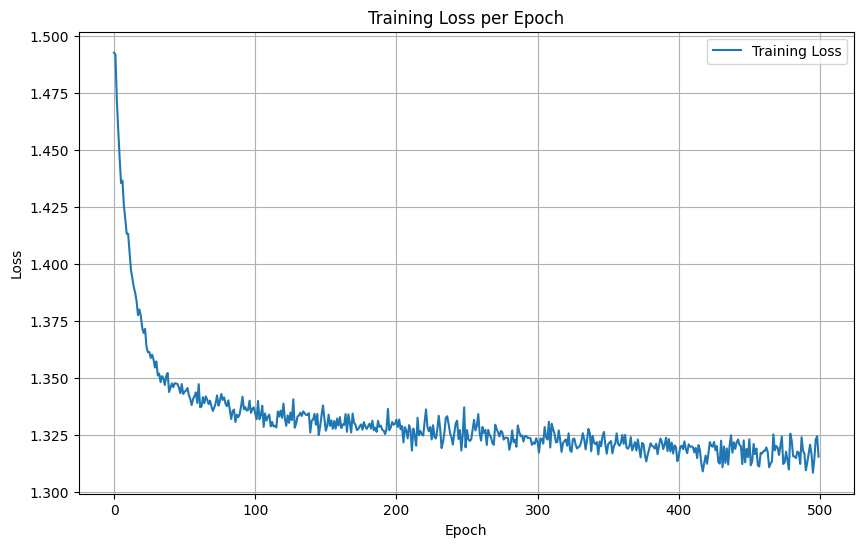

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 예제 데이터프레임 (실제 데이터셋을 사용하는 경우 이 부분은 삭제)
final_df.loc[::20, ['cosmo_area', 'cosmo_volume']] = np.nan

# 목표 변수 인코딩 및 특성/목표 정의
le = LabelEncoder()
final_df['vDILIConcern_encoded'] = le.fit_transform(final_df['vDILIConcern'])
target_names = le.classes_

feature_cols = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']
X = final_df[feature_cols].values
y = final_df['vDILIConcern_encoded'].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 전처리 파이프라인 적용
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# PyTorch 텐서 및 DataLoader 준비
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# MLP 모델 정의
input_size = X_train_scaled.shape[1]
output_size = len(target_names)

class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = MLP(input_size, output_size)

# 손실 함수 및 최적화 도구 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

# 모델 학습
num_epochs = 500
loss_history = []  # 손실 값 저장을 위한 리스트
print("모델 학습 시작...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)

    # 에포크별 평균 손실 계산 및 저장
    avg_epoch_loss = epoch_loss / len(train_loader.dataset)
    loss_history.append(avg_epoch_loss)

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# 모델 평가 (이전 코드와 동일)
model.eval()
with torch.no_grad():
    all_preds = []
    all_probas = []
    all_labels = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.numpy())
        all_probas.extend(probabilities.numpy())
        all_labels.extend(labels.numpy())

y_test_np = np.array(all_labels)
y_pred_np = np.array(all_preds)
y_pred_proba_np = np.array(all_probas)

# 성능 지표 계산 및 출력 (이전 코드와 동일)
print("\n=== PyTorch MLP 모델 성능 지표 ===")
print(f"정확도 (Accuracy): {accuracy_score(y_test_np, y_pred_np):.4f}")
print("\n--- 클래스별 상세 지표 ---")
print(classification_report(y_test_np, y_pred_np, target_names=target_names, zero_division=0))

# 다중 클래스 AUC 계산 및 ROC 커브 시각화 (이전 코드와 동일)
y_test_onehot = pd.get_dummies(y_test_np).to_numpy()

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple']
aucs = []

for i in range(len(target_names)):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_pred_proba_np[:, i])
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve for {target_names[i]} (AUC = {roc_auc:.4f})')

macro_auc = np.mean(aucs)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=f'Macro-average AUC = {macro_auc:.4f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\n매크로 평균 AUC: {macro_auc:.4f}")

# [새로 추가된 부분] 에포크별 손실 그래프
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# [2] vDILIConcern 2개(Most, Less -> 1, Ambiguous, No -> 0) 이진 분류하기

## 이진 분류 학습시키기

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# vDILIConcern을 이진 클래스로 매핑
# 'Most'와 'Ambiguous'는 1로, 'No'와 'Less'는 0으로 변환
final_df['vDILIConcern_binary'] = np.where(final_df['vDILIConcern'].isin(['vMost-DILI-Concern', 'vLess-DILI-Concern']), 1, 0)

# 특성(X)과 목표 변수(y) 정의
feature_cols = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']

# 결측값 및 데이터 타입 처리
for col in feature_cols:
    if col in final_df.columns:
        # 비숫자 값을 NaN으로 변환하며 데이터 타입을 float로 통일
        final_df[col] = pd.to_numeric(final_df[col], errors='coerce')
        # NaN 값을 해당 열의 평균값으로 대체
        final_df[col] = final_df[col].fillna(final_df[col].mean())
    else:
        print(f"경고: 특성 열 '{col}'이 데이터프레임에 존재하지 않습니다.")

X2 = final_df[feature_cols]
y2 = final_df['vDILIConcern_binary'] # 이진 목표 변수 사용

# 학습/테스트 데이터 분할
# 이진 분류이므로 stratify=y를 사용하여 클래스 비율을 유지합니다.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y)

print("변환 후 'vDILIConcern_binary' 열:")
print(final_df[['vDILIConcern', 'vDILIConcern_binary']])
print("\nX_train.shape:", X2_train.shape)
print("X_test.shape:", X2_test.shape)
print("y_train.shape:", y2_train.shape)
print("y_test.shape:", y2_test.shape)

변환 후 'vDILIConcern_binary' 열:
               vDILIConcern  vDILIConcern_binary
0    Ambiguous DILI-concern                    0
1    Ambiguous DILI-concern                    0
2    Ambiguous DILI-concern                    0
3    Ambiguous DILI-concern                    0
4    Ambiguous DILI-concern                    0
..                      ...                  ...
900      vLess-DILI-Concern                    1
901      vLess-DILI-Concern                    1
902      vMost-DILI-Concern                    1
903      vMost-DILI-Concern                    1
904      vMost-DILI-Concern                    1

[905 rows x 2 columns]

X_train.shape: (724, 5)
X_test.shape: (181, 5)
y_train.shape: (724,)
y_test.shape: (181,)


## XGBoost

=== XGBoost 모델 성능 지표 ===
정확도 (Accuracy): 0.5912
정밀도 (Precision): 0.5698
재현율 (Recall): 0.5698
F1-점수 (F1-Score): 0.5698

--- 클래스별 상세 지표 ---
                      precision    recall  f1-score   support

Ambiguous/No Concern       0.61      0.61      0.61        95
   Most/Less Concern       0.57      0.57      0.57        86

            accuracy                           0.59       181
           macro avg       0.59      0.59      0.59       181
        weighted avg       0.59      0.59      0.59       181


AUC: 0.6266


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:46:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


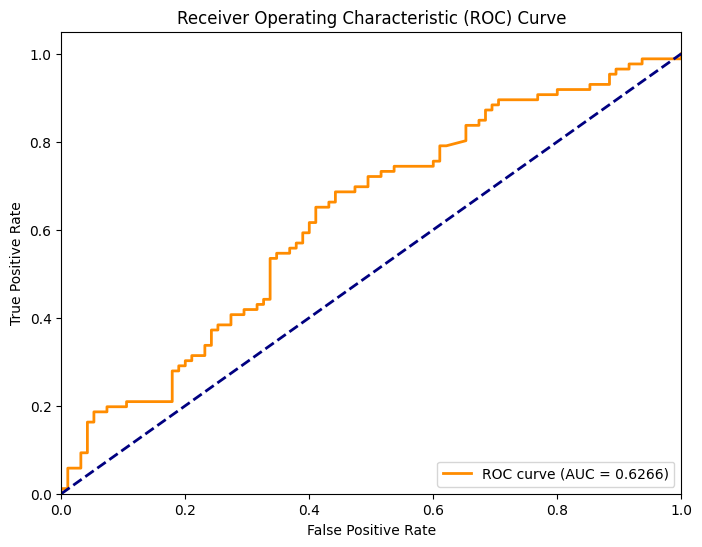

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    classification_report
)
import matplotlib.pyplot as plt

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X2_train, y2_train)

# 예측값 및 예측 확률 계산
y2_pred = xgb_model.predict(X2_test)
y2_pred_proba = xgb_model.predict_proba(X2_test)[:, 1] # 클래스 1에 대한 예측 확률


# 1. 성능 지표 계산 및 출력
print("=== XGBoost 모델 성능 지표 ===")
print(f"정확도 (Accuracy): {accuracy_score(y2_test, y2_pred):.4f}")
print(f"정밀도 (Precision): {precision_score(y2_test, y2_pred, zero_division=0):.4f}")
print(f"재현율 (Recall): {recall_score(y2_test, y2_pred, zero_division=0):.4f}")
print(f"F1-점수 (F1-Score): {f1_score(y2_test, y2_pred, zero_division=0):.4f}")
print("\n--- 클래스별 상세 지표 ---")
print(classification_report(y2_test, y2_pred, target_names=['Ambiguous/No Concern', 'Most/Less Concern'], zero_division=0))

# 2. AUC 계산 및 출력
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.4f}")

# 3. ROC 커브 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## MLP

모델 학습 시작...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



=== PyTorch MLP 모델 성능 지표 (이진 분류) ===
정확도 (Accuracy): 0.5912

--- 클래스별 상세 지표 ---
                      precision    recall  f1-score   support

Ambiguous/No Concern       0.59      0.73      0.65        95
   Most/Less Concern       0.59      0.44      0.51        86

            accuracy                           0.59       181
           macro avg       0.59      0.58      0.58       181
        weighted avg       0.59      0.59      0.58       181



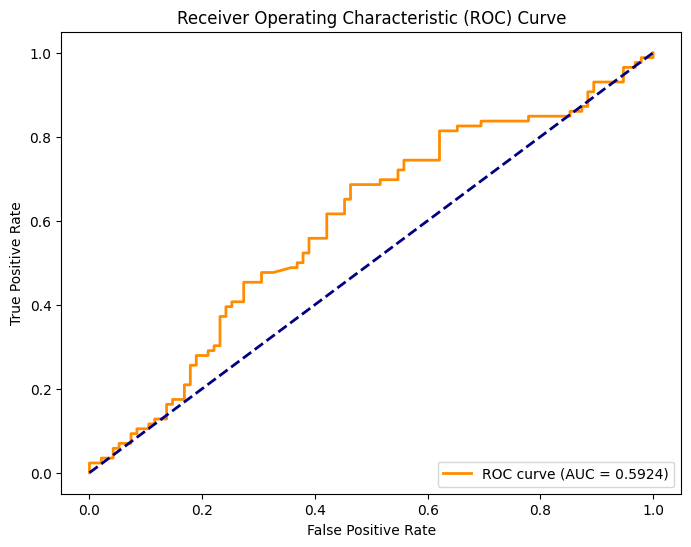


AUC: 0.5924


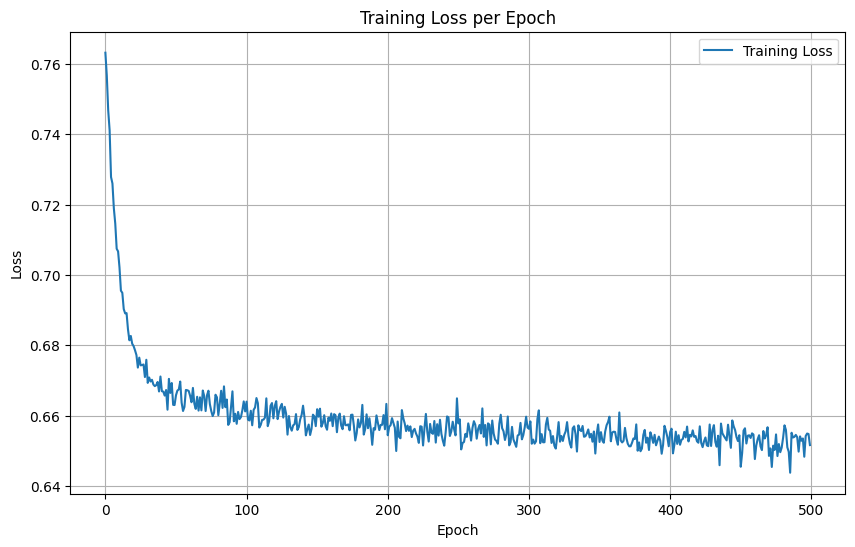

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 예제 데이터프레임 (실제 데이터셋을 사용하는 경우 이 부분은 삭제)
final_df.loc[::20, ['cosmo_area', 'cosmo_volume']] = np.nan

# 이진 분류를 위한 목표 변수 매핑
target_names2 = ['Ambiguous/No Concern', 'Most/Less Concern']

feature_cols2 = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']
X2 = final_df[feature_cols2].values
y2 = final_df['vDILIConcern_binary'].values

# 데이터 분할
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)


# 데이터 전처리 파이프라인
imputer2 = SimpleImputer(strategy='mean')
X2_train_imputed = imputer2.fit_transform(X2_train)
X2_test_imputed = imputer2.transform(X2_test)
X2_train_imputed[np.isnan(X2_train_imputed)] = 0
X2_test_imputed[np.isnan(X2_test_imputed)] = 0

scaler2 = MinMaxScaler()
X2_train_scaled = scaler2.fit_transform(X2_train_imputed)
X2_test_scaled = scaler2.transform(X2_test_imputed)

# PyTorch 텐서 및 DataLoader 준비
X2_train_tensor = torch.tensor(X2_train_scaled, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.long)
X2_test_tensor = torch.tensor(X2_test_scaled, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.long)

train_dataset2 = TensorDataset(X2_train_tensor, y2_train_tensor)
test_dataset2 = TensorDataset(X2_test_tensor, y2_test_tensor)

train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)


# MLP 모델 정의
input_size2 = X2_train_scaled.shape[1]
output_size2 = len(target_names2)

class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model2 = MLP(input_size2, output_size2)

# 손실 함수 및 최적화 도구 정의
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.00005)

# 모델 학습
num_epochs2 = 500
loss_history2 = []
print("모델 학습 시작...")
for epoch in range(num_epochs2):
    model2.train()
    epoch_loss2 = 0.0
    for inputs2, labels2 in train_loader2:
        optimizer2.zero_grad()
        outputs2 = model2(inputs2)
        loss2 = criterion2(outputs2, labels2)
        loss2.backward()
        torch.nn.utils.clip_grad_norm_(model2.parameters(), max_norm=1.0)
        optimizer2.step()
        epoch_loss2 += loss2.item() * inputs2.size(0)

    avg_epoch_loss2 = epoch_loss2 / len(train_loader2.dataset)
    loss_history2.append(avg_epoch_loss2)

# 모델 평가
model2.eval()
with torch.no_grad():
    all_preds2 = []
    all_probas2 = []
    all_labels2 = []
    for inputs2, labels2 in test_loader2:
        outputs2 = model2(inputs2)
        probabilities2 = torch.softmax(outputs2, dim=1)
        _, predicted2 = torch.max(outputs2.data, 1)
        all_preds2.extend(predicted2.numpy())
        all_probas2.extend(probabilities2.numpy())
        all_labels2.extend(labels2.numpy())

y2_test_np = np.array(all_labels2)
y2_pred_np = np.array(all_preds2)
y2_pred_proba_np = np.array(all_probas2)


# 성능 지표 계산 및 출력
print("\n=== PyTorch MLP 모델 성능 지표 (이진 분류) ===")
print(f"정확도 (Accuracy): {accuracy_score(y2_test_np, y2_pred_np):.4f}")
print("\n--- 클래스별 상세 지표 ---")
print(classification_report(y2_test_np, y2_pred_np, target_names=target_names2, zero_division=0))


# AUC 계산 및 ROC 커브 시각화
fpr2, tpr2, _ = roc_curve(y2_test_np, y2_pred_proba_np[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc2:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC: {roc_auc2:.4f}")

# 에포크별 손실 그래프
plt.figure(figsize=(10, 6))
plt.plot(loss_history2, label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# [3] vDILI-Concern (Most, Less, Ambiguous -> 1, No -> 0) Binary classification

## 이진 분류 학습시키기


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# vDILIConcern을 이진 클래스로 매핑
# 'Most','Ambiguous','Less'는 1로, 'No'는 0으로 변환
final_df['vDILIConcern_binary2'] = np.where(final_df['vDILIConcern'].isin(['vMost-DILI-Concern', 'vLess-DILI-Concern', 'Ambiguous DILI-concern']), 1, 0)

# 특성(X)과 목표 변수(y) 정의
feature_cols = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']

# 결측값 및 데이터 타입 처리
for col in feature_cols:
    if col in final_df.columns:
        # 비숫자 값을 NaN으로 변환하며 데이터 타입을 float로 통일
        final_df[col] = pd.to_numeric(final_df[col], errors='coerce')
        # NaN 값을 해당 열의 평균값으로 대체
        final_df[col] = final_df[col].fillna(final_df[col].mean())
    else:
        print(f"경고: 특성 열 '{col}'이 데이터프레임에 존재하지 않습니다.")

X3 = final_df[feature_cols]
y3 = final_df['vDILIConcern_binary2'] # 이진 목표 변수 사용

# 학습/테스트 데이터 분할
# 이진 분류이므로 stratify=y를 사용하여 클래스 비율을 유지합니다.
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y)

print("변환 후 'vDILIConcern_binary' 열:")
print(final_df[['vDILIConcern', 'vDILIConcern_binary']])
print("\nX_train.shape:", X3_train.shape)
print("X_test.shape:", X3_test.shape)
print("y_train.shape:", y3_train.shape)
print("y_test.shape:", y3_test.shape)

변환 후 'vDILIConcern_binary' 열:
               vDILIConcern  vDILIConcern_binary
0    Ambiguous DILI-concern                    0
1    Ambiguous DILI-concern                    0
2    Ambiguous DILI-concern                    0
3    Ambiguous DILI-concern                    0
4    Ambiguous DILI-concern                    0
..                      ...                  ...
900      vLess-DILI-Concern                    1
901      vLess-DILI-Concern                    1
902      vMost-DILI-Concern                    1
903      vMost-DILI-Concern                    1
904      vMost-DILI-Concern                    1

[905 rows x 2 columns]

X_train.shape: (724, 5)
X_test.shape: (181, 5)
y_train.shape: (724,)
y_test.shape: (181,)


## XGBoost

=== XGBoost 모델 성능 지표 ===
정확도 (Accuracy): 0.7182
정밀도 (Precision): 0.7740
재현율 (Recall): 0.8626
F1-점수 (F1-Score): 0.8159

--- 클래스별 상세 지표 ---
                             precision    recall  f1-score   support

                 No Concern       0.49      0.34      0.40        50
Most/Less/Ambiguous Concern       0.77      0.86      0.82       131

                   accuracy                           0.72       181
                  macro avg       0.63      0.60      0.61       181
               weighted avg       0.69      0.72      0.70       181


AUC: 0.6656


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:46:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


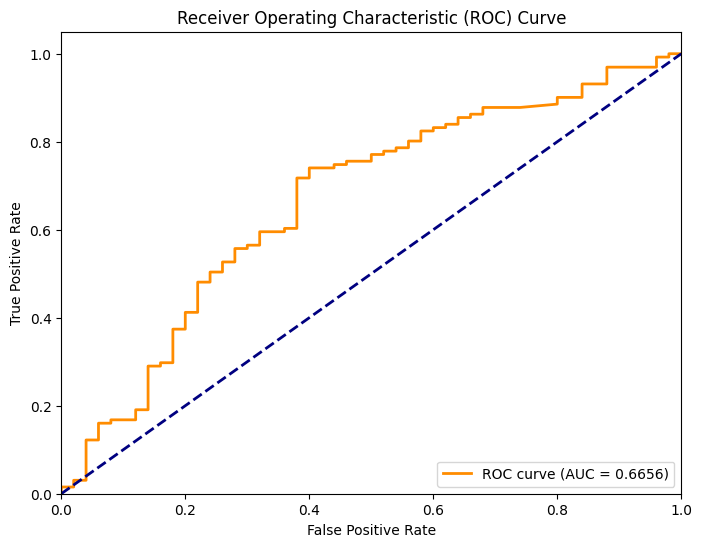

In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    classification_report
)
import matplotlib.pyplot as plt

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X3_train, y3_train)

# 예측값 및 예측 확률 계산
y3_pred = xgb_model.predict(X3_test)
y3_pred_proba = xgb_model.predict_proba(X3_test)[:, 1] # 클래스 1에 대한 예측 확률


# 1. 성능 지표 계산 및 출력
print("=== XGBoost 모델 성능 지표 ===")
print(f"정확도 (Accuracy): {accuracy_score(y3_test, y3_pred):.4f}")
print(f"정밀도 (Precision): {precision_score(y3_test, y3_pred, zero_division=0):.4f}")
print(f"재현율 (Recall): {recall_score(y3_test, y3_pred, zero_division=0):.4f}")
print(f"F1-점수 (F1-Score): {f1_score(y3_test, y3_pred, zero_division=0):.4f}")
print("\n--- 클래스별 상세 지표 ---")
print(classification_report(y3_test, y3_pred, target_names=['No Concern', 'Most/Less/Ambiguous Concern'], zero_division=0))

# 2. AUC 계산 및 출력
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.4f}")

# 3. ROC 커브 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## MLP

모델 학습 시작...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



=== PyTorch MLP 모델 성능 지표 (이진 분류) ===
정확도 (Accuracy): 0.7238

--- 클래스별 상세 지표 ---
                             precision    recall  f1-score   support

                 No Concern       0.50      0.02      0.04        50
Most/Less/Ambiguous Concern       0.73      0.99      0.84       131

                   accuracy                           0.72       181
                  macro avg       0.61      0.51      0.44       181
               weighted avg       0.66      0.72      0.62       181



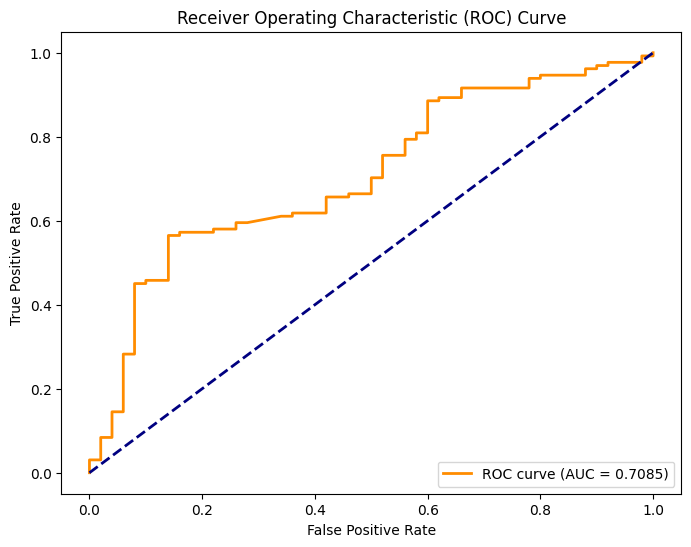


AUC: 0.7085


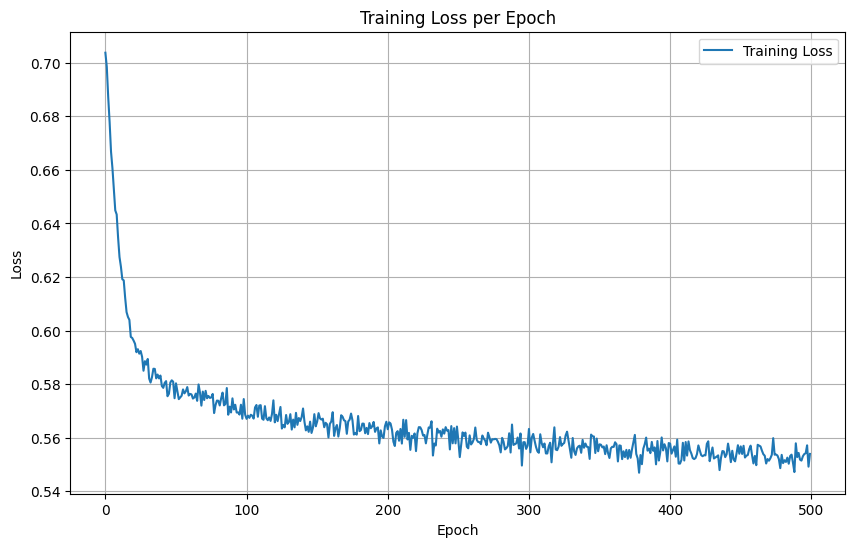

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 예제 데이터프레임 (실제 데이터셋을 사용하는 경우 이 부분은 삭제)
final_df.loc[::20, ['cosmo_area', 'cosmo_volume']] = np.nan

# [수정된 부분] 이진 분류를 위한 목표 변수 매핑
# 'No' -> 0, 'Most', 'Less', 'Ambiguous' -> 1 로 매핑합니다.
target_names3 = ['No Concern', 'Most/Less/Ambiguous Concern']

feature_cols3 = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']
X3 = final_df[feature_cols3].values
y3 = final_df['vDILIConcern_binary2'].values

# 데이터 분할
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)


# 데이터 전처리 파이프라인
imputer3 = SimpleImputer(strategy='mean')
X3_train_imputed = imputer3.fit_transform(X3_train)
X3_test_imputed = imputer3.transform(X3_test)
X3_train_imputed[np.isnan(X3_train_imputed)] = 0
X3_test_imputed[np.isnan(X3_test_imputed)] = 0

scaler3 = MinMaxScaler()
X3_train_scaled = scaler3.fit_transform(X3_train_imputed)
X3_test_scaled = scaler3.transform(X3_test_imputed)

# PyTorch 텐서 및 DataLoader 준비
X3_train_tensor = torch.tensor(X3_train_scaled, dtype=torch.float32)
y3_train_tensor = torch.tensor(y3_train, dtype=torch.long)
X3_test_tensor = torch.tensor(X3_test_scaled, dtype=torch.float32)
y3_test_tensor = torch.tensor(y3_test, dtype=torch.long)

train_dataset3 = TensorDataset(X3_train_tensor, y3_train_tensor)
test_dataset3 = TensorDataset(X3_test_tensor, y3_test_tensor)

train_loader3 = DataLoader(train_dataset3, batch_size=32, shuffle=True)
test_loader3 = DataLoader(test_dataset3, batch_size=32, shuffle=False)


# MLP 모델 정의
input_size3 = X3_train_scaled.shape[1]
output_size3 = len(target_names3)

class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model3 = MLP(input_size3, output_size3)

# 손실 함수 및 최적화 도구 정의
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.00005)

# 모델 학습
num_epochs3 = 500
loss_history3 = []
print("모델 학습 시작...")
for epoch in range(num_epochs3):
    model3.train()
    epoch_loss3 = 0.0
    for inputs3, labels3 in train_loader3:
        optimizer3.zero_grad()
        outputs3 = model3(inputs3)
        loss3 = criterion3(outputs3, labels3)
        loss3.backward()
        torch.nn.utils.clip_grad_norm_(model3.parameters(), max_norm=1.0)
        optimizer3.step()
        epoch_loss3 += loss3.item() * inputs3.size(0)

    avg_epoch_loss3 = epoch_loss3 / len(train_loader3.dataset)
    loss_history3.append(avg_epoch_loss3)

# 모델 평가
model3.eval()
with torch.no_grad():
    all_preds3 = []
    all_probas3 = []
    all_labels3 = []
    for inputs3, labels3 in test_loader3:
        outputs3 = model3(inputs3)
        probabilities3 = torch.softmax(outputs3, dim=1)
        _, predicted3 = torch.max(outputs3.data, 1)
        all_preds3.extend(predicted3.numpy())
        all_probas3.extend(probabilities3.numpy())
        all_labels3.extend(labels3.numpy())

y3_test_np = np.array(all_labels3)
y3_pred_np = np.array(all_preds3)
y3_pred_proba_np = np.array(all_probas3)


# 성능 지표 계산 및 출력
print("\n=== PyTorch MLP 모델 성능 지표 (이진 분류) ===")
print(f"정확도 (Accuracy): {accuracy_score(y3_test_np, y3_pred_np):.4f}")
print("\n--- 클래스별 상세 지표 ---")
print(classification_report(y3_test_np, y3_pred_np, target_names=target_names3, zero_division=0))


# AUC 계산 및 ROC 커브 시각화
fpr3, tpr3, _ = roc_curve(y3_test_np, y3_pred_proba_np[:, 1])
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc3:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC: {roc_auc3:.4f}")

# 에포크별 손실 그래프
plt.figure(figsize=(10, 6))
plt.plot(loss_history3, label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            905 non-null    int64  
 1   SMILES                905 non-null    object 
 2   Severity Class        905 non-null    int64  
 3   vDILIConcern          905 non-null    object 
 4   SMILES_qm             905 non-null    object 
 5   Severity Class_qm     905 non-null    int64  
 6   vDILIConcern_qm       905 non-null    object 
 7   hof                   905 non-null    float64
 8   cosmo_area            0 non-null      float64
 9   cosmo_volume          0 non-null      float64
 10  homo                  905 non-null    float64
 11  lumo                  905 non-null    float64
 12  vDILIConcern_encoded  905 non-null    int64  
 13  vDILIConcern_binary   905 non-null    int64  
 14  vDILIConcern_binary2  905 non-null    int64  
dtypes: float64(5), int64(6)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:46:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [3 4]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: 

=== 모델 성능 비교 ===
          Task    Model  Accuracy  F1-Score       AUC
0  Multi-class  XGBoost  0.370166  0.358814  0.590289
1  Multi-class      MLP  0.248619  0.236785  0.490842
2    Binary V2  XGBoost  0.569061  0.535714  0.594431
3    Binary V2      MLP  0.602210  0.576471  0.607038
4    Binary V3  XGBoost  0.701657  0.808511  0.653588
5    Binary V3      MLP  0.712707  0.820690  0.531908


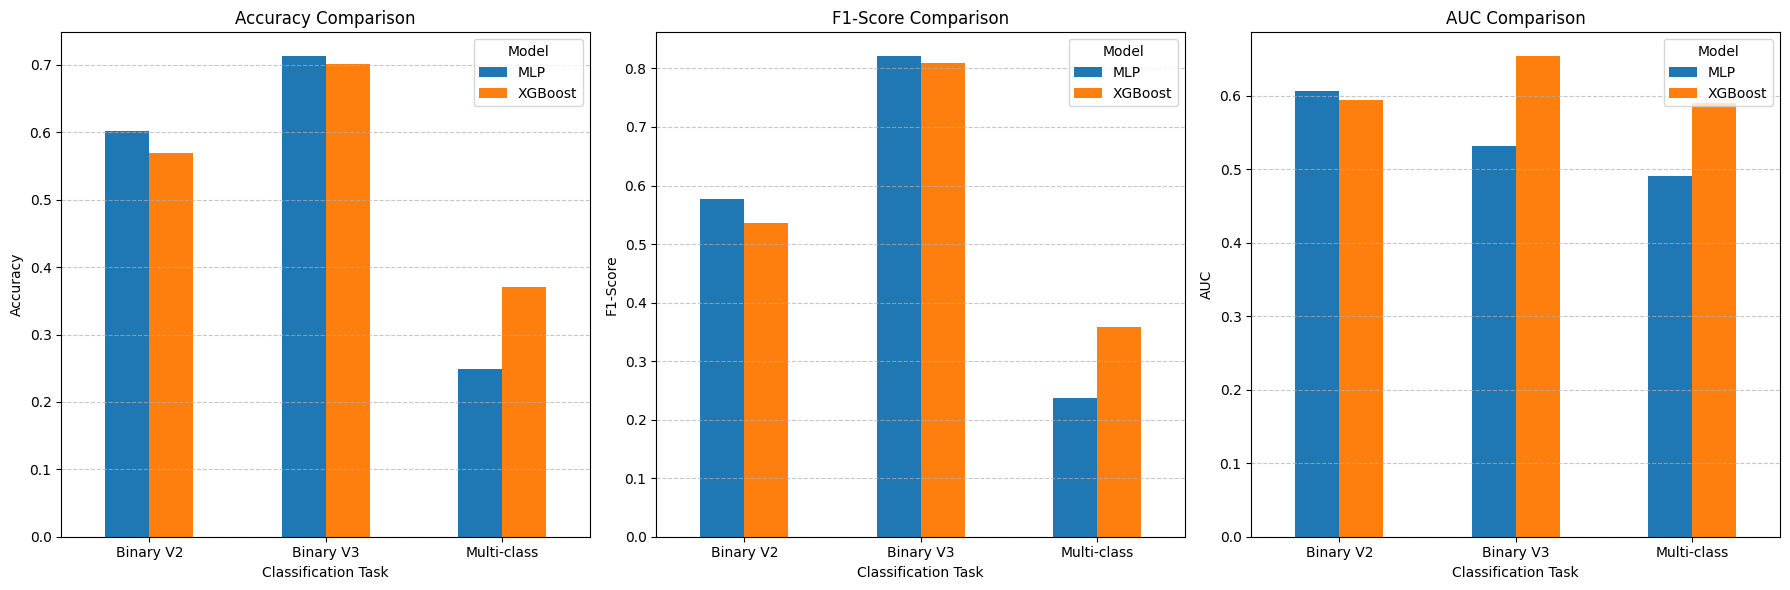

In [24]:
import pandas as pd
import numpy as np
import xgboost as xgb
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# PyTorch용 MLP 모델 클래스 정의 (이전과 동일)
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(64, output_size)
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def create_model_and_evaluate(X, y, task_name, model_type):
    """모델을 학습하고 평가 지표를 반환하는 함수"""
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 데이터 전처리
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    X_train_imputed[np.isnan(X_train_imputed)] = 0
    X_test_imputed[np.isnan(X_test_imputed)] = 0
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # 모델 학습 및 예측
    if model_type == 'XGBoost':
        if task_name == 'Multi-class':
            model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), eval_metric='merror', use_label_encoder=False, random_state=42)
        else:
            model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)

    elif model_type == 'MLP':
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

        input_size = X_train_scaled.shape[1]
        output_size = len(np.unique(y))
        model = MLP(input_size, output_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

        # 모델 학습 루프
        for epoch in range(100):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor)
            y_pred_proba = torch.softmax(outputs, dim=1).numpy()
            y_pred = np.argmax(y_pred_proba, axis=1)

    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)

    # 이진 분류 vs 다중 분류에 따라 f1과 auc 계산 방식 변경
    if task_name == 'Multi-class':
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        try:
            auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
        except ValueError:
            auc_score = 0
    else:
        f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
        try:
            auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
        except ValueError:
            auc_score = 0

    return accuracy, f1, auc_score

# 데이터셋 생성
def create_dataset():
    df = final_df.copy()
    df.loc[::20, ['cosmo_area', 'cosmo_volume']] = np.nan
    return df

# 결과 저장용 딕셔너리
results = {
    'Task': [], 'Model': [], 'Accuracy': [], 'F1-Score': [], 'AUC': []
}

# 1. 다중 클래스 분류 (4개 클래스)
df1 = create_dataset()
le1 = LabelEncoder()
df1['vDILIConcern_encoded'] = le1.fit_transform(df1['vDILIConcern'])
X1 = df1[['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']].values
y1 = df1['vDILIConcern_encoded'].values

for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc_score = create_model_and_evaluate(X1, y1, 'Multi-class', model_type)
    results['Task'].append('Multi-class')
    results['Model'].append(model_type)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc_score)

# 2. 이진 분류 (Most, Less -> 1, Ambiguous, No -> 0)
df2 = create_dataset()
X2 = df2[['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']].values
y2 = df2['vDILIConcern_binary'].values

for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc_score = create_model_and_evaluate(X2, y2, 'Binary V2', model_type)
    results['Task'].append('Binary V2')
    results['Model'].append(model_type)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc_score)

# 3. 이진 분류 (Most, Less, Ambiguous -> 1, No -> 0)
df3 = create_dataset()
X3 = df3[['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']].values
y3 = df3['vDILIConcern_binary2'].values

for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc_score = create_model_and_evaluate(X3, y3, 'Binary V3', model_type)
    results['Task'].append('Binary V3')
    results['Model'].append(model_type)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc_score)

results_df = pd.DataFrame(results)
print("=== 모델 성능 비교 ===")
print(results_df)

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics = ['Accuracy', 'F1-Score', 'AUC']

for i, metric in enumerate(metrics):
    pivot_df = results_df.pivot_table(index='Task', columns='Model', values=metric)
    pivot_df.plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Classification Task')
    axes[i].legend(title='Model')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# [4] homo lumo 정보 추가하기

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:46:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:46:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:46:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== 모델 성능 비교 (특징 공학 적용 후) ===
          Task    Model  Accuracy  F1-Score       AUC
0  Multi-class  XGBoost     0.290  0.288508  0.525624
1  Multi-class      MLP     0.245  0.223685  0.512051
2    Binary V2  XGBoost     0.450  0.427083  0.467647
3    Binary V2      MLP     0.475  0.455959  0.451245
4    Binary V3  XGBoost     0.525  0.517766  0.518507
5    Binary V3      MLP     0.550  0.430380  0.539016


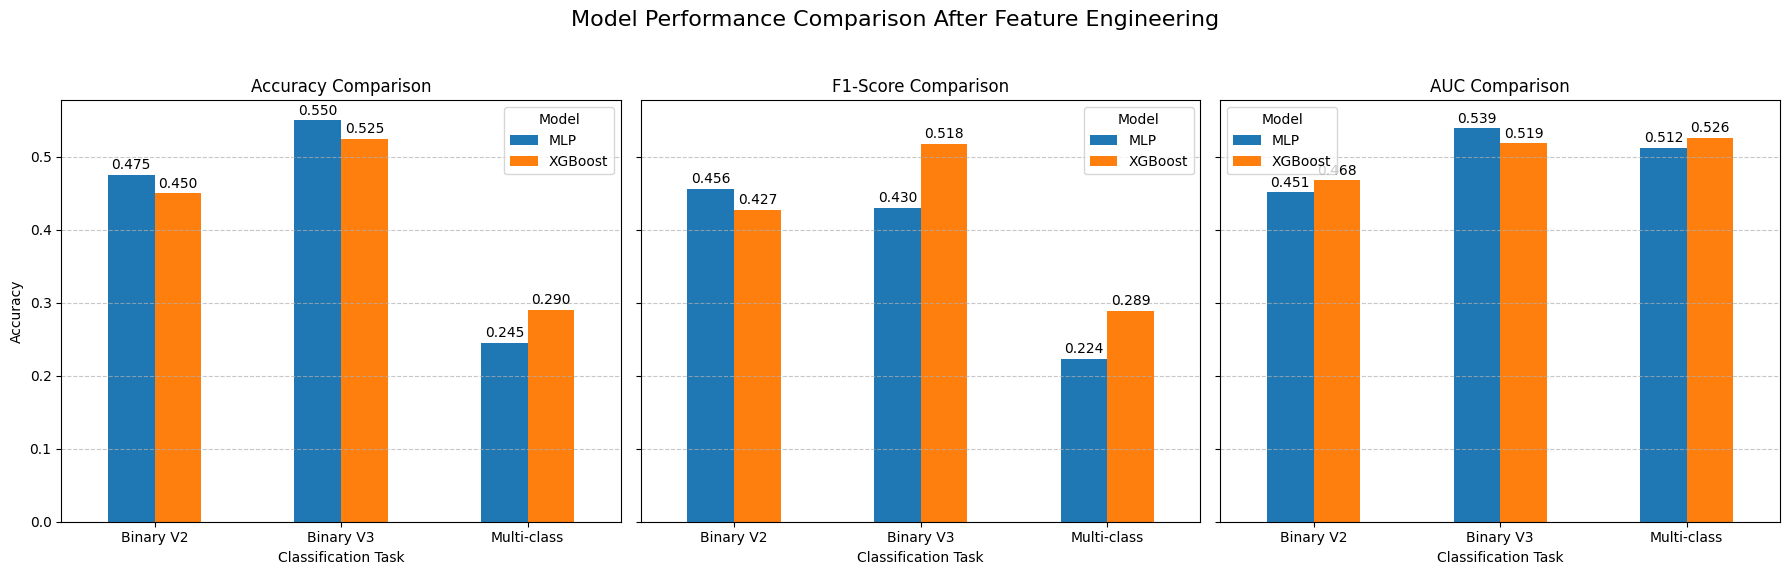

In [25]:
import pandas as pd
import numpy as np
import xgboost as xgb
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# --- 사용자 참고 ---
# 이 부분은 사용자의 실제 'final_df' 데이터프레임으로 대체해야 합니다.
# 아래는 코드 실행을 위한 임시 더미 데이터입니다.
# 실제 데이터를 사용하면 결과가 다르게 나타납니다.
data = {
    'hof': np.random.rand(1000) * 10,
    'homo': np.random.rand(1000) * -1 - 5,
    'lumo': np.random.rand(1000) + 1,
    'cosmo_area': np.random.rand(1000) * 100 + 50,
    'cosmo_volume': np.random.rand(1000) * 200 + 100,
    'vDILIConcern': np.random.choice(['Most-concern', 'Less-concern', 'No-concern', 'Ambiguous-concern'], 1000),
    'vDILIConcern_binary': np.random.randint(0, 2, 1000),
    'vDILIConcern_binary2': np.random.randint(0, 2, 1000),
}
final_df = pd.DataFrame(data)
# --- 여기까지 ---


# PyTorch용 MLP 모델 클래스 정의 (기존과 동일)
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(64, output_size)
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def create_model_and_evaluate(X, y, task_name, model_type):
    """모델을 학습하고 평가 지표를 반환하는 함수"""
    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # 데이터 전처리
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    X_train_imputed[np.isnan(X_train_imputed)] = 0
    X_test_imputed[np.isnan(X_test_imputed)] = 0
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # 모델 학습 및 예측
    if model_type == 'XGBoost':
        if task_name == 'Multi-class':
            model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), eval_metric='merror', use_label_encoder=False, random_state=42)
        else:
            model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)

    elif model_type == 'MLP':
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

        input_size = X_train_scaled.shape[1]
        output_size = len(np.unique(y))
        model = MLP(input_size, output_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)

        # 모델 학습 루프
        for epoch in range(100):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor)
            y_pred_proba = torch.softmax(outputs, dim=1).numpy()
            y_pred = np.argmax(y_pred_proba, axis=1)

    # 성능 지표 계산
    accuracy = accuracy_score(y_test, y_pred)

    if task_name == 'Multi-class':
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        try:
            auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
        except ValueError:
            auc_score = 0
    else:
        f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
        try:
            auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
        except ValueError:
            auc_score = 0

    return accuracy, f1, auc_score

# 데이터셋 생성 및 특징 공학 적용 함수
def create_dataset():
    """데이터셋을 복사하고 새로운 특징을 추가하는 함수"""
    df = final_df.copy()

    # --- 특징 공학 (Feature Engineering) ---
    # 1. HOMO-LUMO Gap: 분자의 반응성/안정성과 관련된 중요한 지표
    df['homo_lumo_gap'] = df['lumo'] - df['homo']

    # 2. 면적/부피 비율: 분자의 형태학적 특성을 나타내는 지표
    # 0으로 나누는 오류를 방지하기 위해 분모에 작은 값(epsilon)을 더함
    df['area_volume_ratio'] = df['cosmo_area'] / (df['cosmo_volume'] + 1e-6)

    # 기존 코드와 동일하게 일부 데이터를 결측치(NaN)로 만듦
    # 새로 만든 area_volume_ratio도 함께 NaN 처리
    nan_indices = df.index[::20]
    df.loc[nan_indices, ['cosmo_area', 'cosmo_volume', 'area_volume_ratio']] = np.nan

    return df

# 결과 저장용 딕셔너리
results = {
    'Task': [], 'Model': [], 'Accuracy': [], 'F1-Score': [], 'AUC': []
}

# --- 사용할 특징 목록 정의 (새로운 특징 포함) ---
feature_columns = [
    'hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume',
    'homo_lumo_gap', 'area_volume_ratio'
]

# 1. 다중 클래스 분류 (4개 클래스)
df1 = create_dataset()
le1 = LabelEncoder()
df1['vDILIConcern_encoded'] = le1.fit_transform(df1['vDILIConcern'])
X1 = df1[feature_columns].values
y1 = df1['vDILIConcern_encoded'].values

for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc_score = create_model_and_evaluate(X1, y1, 'Multi-class', model_type)
    results['Task'].append('Multi-class')
    results['Model'].append(model_type)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc_score)

# 2. 이진 분류 (Most, Less -> 1, Ambiguous, No -> 0)
df2 = create_dataset()
X2 = df2[feature_columns].values
y2 = df2['vDILIConcern_binary'].values

for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc_score = create_model_and_evaluate(X2, y2, 'Binary V2', model_type)
    results['Task'].append('Binary V2')
    results['Model'].append(model_type)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc_score)

# 3. 이진 분류 (Most, Less, Ambiguous -> 1, No -> 0)
df3 = create_dataset()
X3 = df3[feature_columns].values
y3 = df3['vDILIConcern_binary2'].values

for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc_score = create_model_and_evaluate(X3, y3, 'Binary V3', model_type)
    results['Task'].append('Binary V3')
    results['Model'].append(model_type)
    results['Accuracy'].append(acc)
    results['F1-Score'].append(f1)
    results['AUC'].append(auc_score)

results_df = pd.DataFrame(results)
print("=== 모델 성능 비교 (특징 공학 적용 후) ===")
print(results_df)

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ['Accuracy', 'F1-Score', 'AUC']

for i, metric in enumerate(metrics):
    pivot_df = results_df.pivot_table(index='Task', columns='Model', values=metric)
    pivot_df.plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Classification Task')
    axes[i].legend(title='Model')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    # y축 값 표시
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.3f', label_type='edge', padding=2)

plt.suptitle('Model Performance Comparison After Feature Engineering', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hof                   1000 non-null   float64
 1   homo                  1000 non-null   float64
 2   lumo                  1000 non-null   float64
 3   cosmo_area            950 non-null    float64
 4   cosmo_volume          950 non-null    float64
 5   vDILIConcern          1000 non-null   object 
 6   vDILIConcern_binary   1000 non-null   int64  
 7   vDILIConcern_binary2  1000 non-null   int64  
 8   homo_lumo_gap         1000 non-null   float64
 9   area_volume_ratio     950 non-null    float64
 10  vDILIConcern_encoded  1000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 86.1+ KB


# [5] 성능 향상 5가지 방법 적용하기

1. (가장 먼저) 특징 공학을 적용하여 homo_lumo_gap과 같은 강력한 특징을 추가합니다.
2. XGBoost 하이퍼파라미터 튜닝을 GridSearchCV로 수행합니다. 이 방법은 상대적으로 구현이 간단하면서도 성능 향상 효과가 큽니다.
3. 더 안정적인 성능 평가를 위해 교차 검증을 도입합니다.
4. MLP 모델의 구조를 개선하고(더 깊게/넓게, Dropout 추가), 조기 종료와 학습률 스케줄러를 포함한 학습 루프를 구현합니다.
5. 데이터의 클래스 분포를 확인 (pd.Series(y).value_counts())하고, 불균형이 심하다면 클래스 가중치를 적용합니다.

Using device: cuda
Processing Task 1: Multi-class...
Processing Task 2: Binary V2...
Processing Task 3: Binary V3...

=== 최종 모델 성능 비교 (모든 개선 사항 적용 후) ===
          Task    Model  Accuracy  F1-Score       AUC
0  Multi-class  XGBoost     0.435  0.230446  0.526773
1  Multi-class      MLP     0.274  0.176712  0.510845
2    Binary V2  XGBoost     0.506  0.491367  0.526314
3    Binary V2      MLP     0.528  0.500126  0.525755
4    Binary V3  XGBoost     0.477  0.466552  0.477929
5    Binary V3      MLP     0.501  0.364639  0.518281


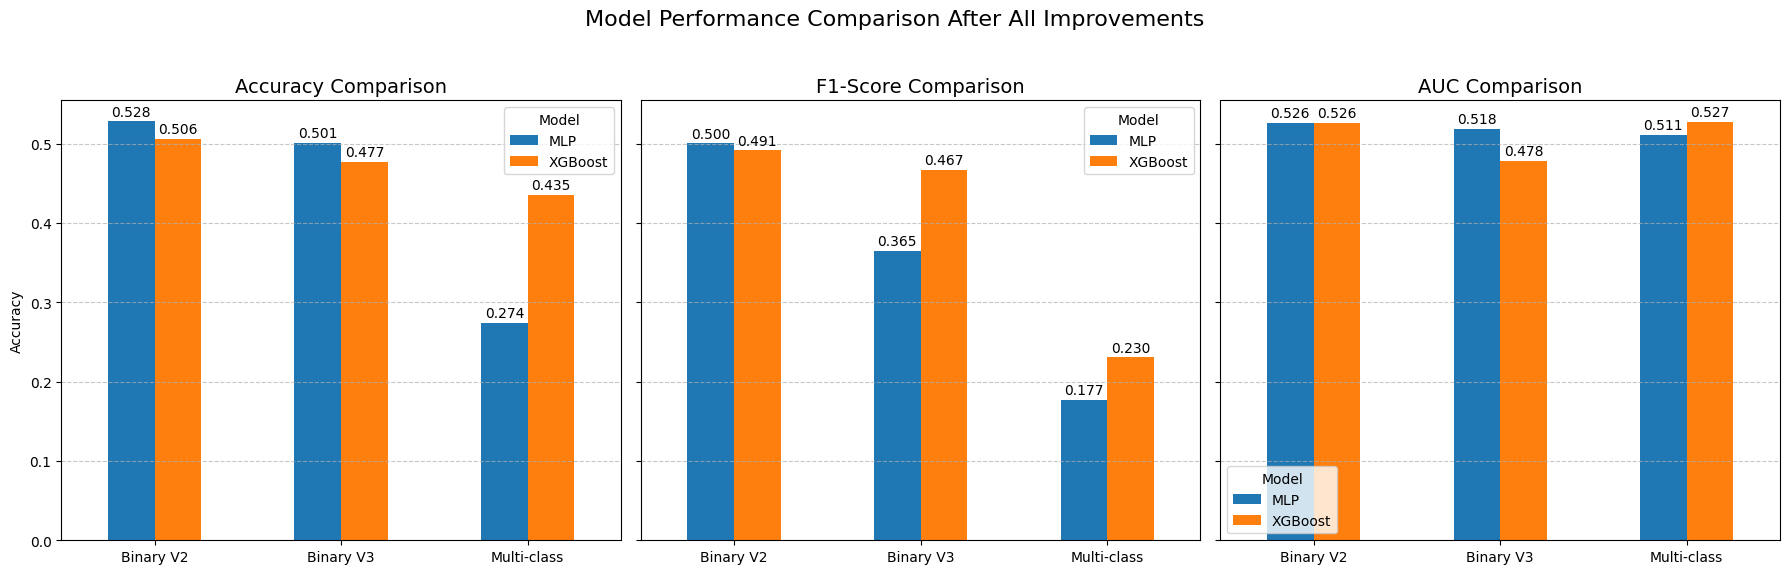

In [27]:
import pandas as pd
import numpy as np
import xgboost as xgb
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import copy
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=UserWarning)

# --- 사용자 참고 ---
# 이 부분은 사용자의 실제 'final_df' 데이터프레임으로 대체해야 합니다.
# 아래는 코드 실행을 위한 임시 더미 데이터입니다.
data = {
    'hof': np.random.rand(1000) * 10,
    'homo': np.random.rand(1000) * -1 - 5,
    'lumo': np.random.rand(1000) + 1,
    'cosmo_area': np.random.rand(1000) * 100 + 50,
    'cosmo_volume': np.random.rand(1000) * 200 + 100,
    'vDILIConcern': np.random.choice(['Most-concern', 'Less-concern', 'No-concern', 'Ambiguous-concern'], 1000, p=[0.1, 0.2, 0.5, 0.2]),
    'vDILIConcern_binary': np.random.randint(0, 2, 1000),
    'vDILIConcern_binary2': np.random.randint(0, 2, 1000),
}
final_df = pd.DataFrame(data)
# --- 여기까지 ---

# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 4. 개선된 MLP 모델
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, output_size)
        )
    def forward(self, x):
        return self.network(x)

# 1. 특징 공학 적용 함수
def create_dataset():
    df = final_df.copy()
    df['homo_lumo_gap'] = df['lumo'] - df['homo']
    df['area_volume_ratio'] = df['cosmo_area'] / (df['cosmo_volume'] + 1e-6)
    nan_indices = df.index[::20]
    df.loc[nan_indices, ['cosmo_area', 'cosmo_volume', 'area_volume_ratio']] = np.nan
    return df

# MLP 학습을 위한 별도 함수 (조기 종료, 스케줄러, 클래스 가중치 포함)
def train_mlp_model(X_train, y_train, X_val, y_val, class_weights_tensor):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

    input_size = X_train.shape[1]
    output_size = len(np.unique(np.concatenate((y_train, y_val))))

    model = MLP(input_size, output_size).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device)) # 5. 클래스 가중치 적용
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)

    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(200): # 에포크 수를 늘리고 조기 종료로 제어
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = copy.deepcopy(model.state_dict())
        else:
            patience_counter += 1
            if patience_counter >= 20: # 20 에포크 동안 개선 없으면 중단
                # print(f"Early stopping at epoch {epoch}")
                break

    model.load_state_dict(best_model_state)
    return model

# 2. 교차 검증 기반의 전체 실험 파이프라인
def run_experiment(X, y, task_name, model_type):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = {'accuracy': [], 'f1': [], 'auc': []}

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        # 전처리
        imputer = SimpleImputer(strategy='mean')
        X_train_fold = imputer.fit_transform(X_train_fold)
        X_test_fold = imputer.transform(X_test_fold)

        scaler = MinMaxScaler()
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_test_fold = scaler.transform(X_test_fold)

        # 5. 클래스 가중치 계산
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train_fold), y=y_train_fold)

        # 모델 학습
        if model_type == 'XGBoost':
            # 3. XGBoost + GridSearchCV
            param_grid = {
                'max_depth': [3, 4, 5],
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1]
            }

            xgb_params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'use_label_encoder': False, 'random_state': 42}
            if task_name == 'Multi-class':
                xgb_params['objective'] = 'multi:softmax'
                xgb_params['eval_metric'] = 'mlogloss'
                scoring = 'roc_auc_ovr'
            else:
                # 이진 분류 시 클래스 가중치 적용
                scale_pos_weight = class_weights[1] / class_weights[0]
                xgb_params['scale_pos_weight'] = scale_pos_weight
                scoring = 'roc_auc'

            model_xgb = xgb.XGBClassifier(**xgb_params)
            grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring=scoring, cv=3, n_jobs=-1, verbose=0)
            grid_search.fit(X_train_fold, y_train_fold)
            model = grid_search.best_estimator_

        elif model_type == 'MLP':
            # MLP 학습을 위해 학습 데이터를 다시 학습/검증 세트로 분할
            X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_fold, y_train_fold, test_size=0.2, random_state=42, stratify=y_train_fold)
            class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
            model = train_mlp_model(X_train_sub, y_train_sub, X_val, y_val, class_weights_tensor)

        # 평가
        if model_type == 'XGBoost':
            y_pred = model.predict(X_test_fold)
            y_pred_proba = model.predict_proba(X_test_fold)
        elif model_type == 'MLP':
            model.eval()
            with torch.no_grad():
                X_test_tensor = torch.tensor(X_test_fold, dtype=torch.float32).to(device)
                outputs = model(X_test_tensor)
                y_pred_proba = torch.softmax(outputs, dim=1).cpu().numpy()
                y_pred = np.argmax(y_pred_proba, axis=1)

        # 성능 지표 계산
        scores['accuracy'].append(accuracy_score(y_test_fold, y_pred))
        if task_name == 'Multi-class':
            scores['f1'].append(f1_score(y_test_fold, y_pred, average='macro', zero_division=0))
            scores['auc'].append(roc_auc_score(y_test_fold, y_pred_proba, multi_class='ovr', average='macro'))
        else:
            scores['f1'].append(f1_score(y_test_fold, y_pred, average='binary', zero_division=0))
            scores['auc'].append(roc_auc_score(y_test_fold, y_pred_proba[:, 1]))

    # 각 Fold의 평균 점수 반환
    return np.mean(scores['accuracy']), np.mean(scores['f1']), np.mean(scores['auc'])


# --- 메인 실행 로직 ---
results = {'Task': [], 'Model': [], 'Accuracy': [], 'F1-Score': [], 'AUC': []}
feature_columns = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume', 'homo_lumo_gap', 'area_volume_ratio']

# Task 1: 다중 클래스 분류
print("Processing Task 1: Multi-class...")
df1 = create_dataset()
df1['vDILIConcern_encoded'] = LabelEncoder().fit_transform(df1['vDILIConcern'])
X1, y1 = df1[feature_columns].values, df1['vDILIConcern_encoded'].values
for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc = run_experiment(X1, y1, 'Multi-class', model_type)
    results['Task'].append('Multi-class'); results['Model'].append(model_type); results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

# Task 2: 이진 분류 V2
print("Processing Task 2: Binary V2...")
df2 = create_dataset()
X2, y2 = df2[feature_columns].values, df2['vDILIConcern_binary'].values
for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc = run_experiment(X2, y2, 'Binary V2', model_type)
    results['Task'].append('Binary V2'); results['Model'].append(model_type); results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

# Task 3: 이진 분류 V3
print("Processing Task 3: Binary V3...")
df3 = create_dataset()
X3, y3 = df3[feature_columns].values, df3['vDILIConcern_binary2'].values
for model_type in ['XGBoost', 'MLP']:
    acc, f1, auc = run_experiment(X3, y3, 'Binary V3', model_type)
    results['Task'].append('Binary V3'); results['Model'].append(model_type); results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

results_df = pd.DataFrame(results)
print("\n=== 최종 모델 성능 비교 (모든 개선 사항 적용 후) ===")
print(results_df)

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ['Accuracy', 'F1-Score', 'AUC']
for i, metric in enumerate(metrics):
    pivot_df = results_df.pivot_table(index='Task', columns='Model', values=metric)
    pivot_df.plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f'{metric} Comparison', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.3f', label_type='edge', padding=2)
plt.suptitle('Model Performance Comparison After All Improvements', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# [6] 2D descriptor랑 3D descriptor fusion

In [30]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 구글 드라이브 경로 설정
base_dir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터'
wdir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터'
csv_file = 'DILIRANK_WO_M(수정본3).csv'
qm_csv_file = 'dilirank_qm.csv'

# 기존 데이터셋과 MOPAC 계산 결과 데이터셋 불러오기
df_original = pd.read_csv(os.path.join(base_dir, csv_file))
df_qm = pd.read_csv(os.path.join(wdir, qm_csv_file))

# 데이터셋 병합
# qm_results는 인덱스를 기준으로 데이터를 추가했으므로, 인덱스 기준으로 병합합니다.
final_df = pd.merge(df_original, df_qm, how='inner', on='Unnamed: 0', suffixes=('', '_qm'))

# 중복 열 제거 및 필요한 열만 선택
final_df = final_df.loc[:,~final_df.columns.duplicated()]

# 최종 데이터 확인
print("최종 데이터셋의 열 목록:")
print(final_df.columns)

최종 데이터셋의 열 목록:
Index(['Unnamed: 0', 'SMILES', 'Severity Class', 'vDILIConcern', 'SMILES_qm',
       'Severity Class_qm', 'vDILIConcern_qm', 'hof', 'cosmo_area',
       'cosmo_volume', 'homo', 'lumo'],
      dtype='object')


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         905 non-null    int64  
 1   SMILES             905 non-null    object 
 2   Severity Class     905 non-null    int64  
 3   vDILIConcern       905 non-null    object 
 4   SMILES_qm          905 non-null    object 
 5   Severity Class_qm  905 non-null    int64  
 6   vDILIConcern_qm    905 non-null    object 
 7   hof                884 non-null    float64
 8   cosmo_area         884 non-null    object 
 9   cosmo_volume       884 non-null    object 
 10  homo               861 non-null    float64
 11  lumo               861 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 85.0+ KB


In [32]:
# 목표 변수(Target)인 'vDILIConcern'을 인코딩
le = LabelEncoder()
final_df['vDILIConcern_encoded'] = le.fit_transform(final_df['vDILIConcern'])

# 특성(X)과 목표 변수(y) 정의
# X에 사용할 특성 열들을 선택하세요.
# 예: QM 기술자들과 기존 2D 기술자들
feature_cols = ['hof', 'homo', 'lumo', 'cosmo_area', 'cosmo_volume']

# NaN(결측값) 처리: 모델에 따라 다르지만, 여기서는 평균값으로 대체
for col in feature_cols:
    if col in final_df.columns:
        final_df[col] = pd.to_numeric(final_df[col], errors='coerce')
        final_df[col].fillna(final_df[col].mean(), inplace=True)
    else:
        print(f"경고: 특성 열 '{col}'이 데이터프레임에 존재하지 않습니다.")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            905 non-null    int64  
 1   SMILES                905 non-null    object 
 2   Severity Class        905 non-null    int64  
 3   vDILIConcern          905 non-null    object 
 4   SMILES_qm             905 non-null    object 
 5   Severity Class_qm     905 non-null    int64  
 6   vDILIConcern_qm       905 non-null    object 
 7   hof                   905 non-null    float64
 8   cosmo_area            0 non-null      float64
 9   cosmo_volume          0 non-null      float64
 10  homo                  905 non-null    float64
 11  lumo                  905 non-null    float64
 12  vDILIConcern_encoded  905 non-null    int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 92.0+ KB


/tmp/ipython-input-65920409.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[col].fillna(final_df[col].mean(), inplace=True)


In [33]:
final_df['vDILIConcern'].unique()

array(['Ambiguous DILI-concern', 'vNo-DILI-Concern', 'vLess-DILI-Concern',
       'vMost-DILI-Concern'], dtype=object)

Using device: cuda
Step 1: Generating molecular descriptors from SMILES...


Generating Descriptors: 100%|██████████| 100/100 [03:09<00:00,  1.89s/it]



Step 2: Generated 227 new descriptors.
Step 3: Selected 205 features after removing zero-variance features.

Processing Task 1: Multi-class...
  - Training XGBoost...
  - Training MLP...
Processing Task 2: Binary V2...
  - Training XGBoost...
  - Training MLP...
Processing Task 3: Binary V3...
  - Training XGBoost...
  - Training MLP...

=== 최종 모델 성능 비교 (2D/3D 디스크립터 적용 후) ===
          Task    Model  Accuracy  F1-Score       AUC
0  Multi-class  XGBoost      0.37  0.250304  0.485647
1  Multi-class      MLP      0.31  0.229286  0.524811
2    Binary V2  XGBoost      0.49  0.560369  0.506131
3    Binary V2      MLP      0.46  0.193725  0.473404
4    Binary V3  XGBoost      0.48  0.537844  0.530970
5    Binary V3      MLP      0.51  0.480263  0.533071


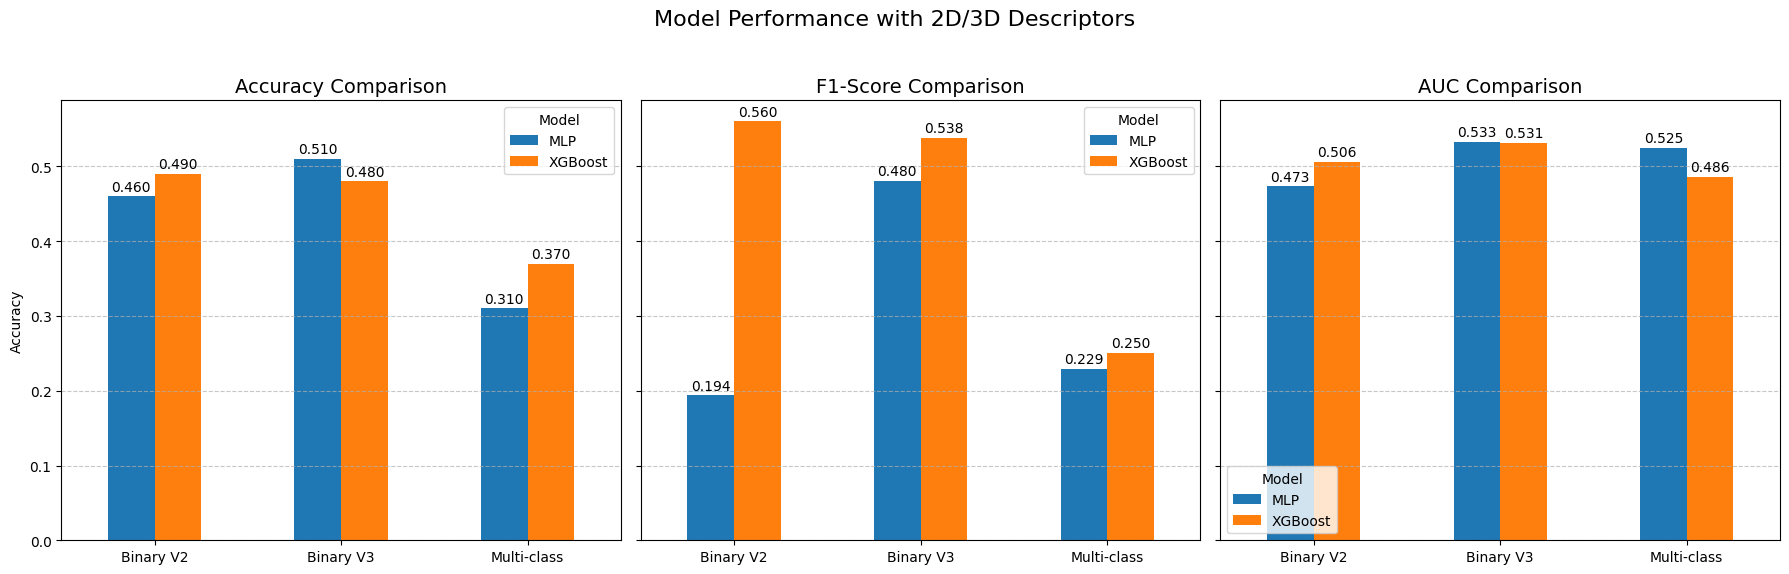

In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import copy
import warnings

# RDKit 라이브러리 임포트
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, Descriptors3D
from tqdm import tqdm

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


# --- 사용자 참고 ---
# 이 부분은 사용자의 실제 'final_df' 데이터프레임으로 대체해야 합니다.
# 중요한 것은 'SMILES' 컬럼이 반드시 포함되어야 한다는 점입니다.
# 아래는 코드 실행을 위한 임시 더미 데이터입니다.
dummy_smiles = final_df['SMILES']

data = {
    # SMILES 컬럼이 핵심입니다.
    'SMILES': np.random.choice(dummy_smiles, 100), # 실제로는 1000개 이상의 고유한 SMILES가 필요합니다.
    'vDILIConcern': np.random.choice(['Ambiguous DILI-concern', 'vNo-DILI-Concern', 'vLess-DILI-Concern',
       'vMost-DILI-Concern'], 100, p=[0.1, 0.2, 0.5, 0.2]),
    'vDILIConcern_binary': np.random.randint(0, 2, 100),
    'vDILIConcern_binary2': np.random.randint(0, 2, 100),
}
final_df = pd.DataFrame(data)
# --- 여기까지 ---


# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# 1. SMILES로부터 2D/3D 디스크립터 생성 함수
def generate_descriptors(df, smiles_col='SMILES'):
    """SMILES 컬럼으로부터 RDKit 2D 및 3D 디스크립터를 생성합니다."""

    descriptor_names_2d = [desc[0] for desc in Descriptors._descList]
    descriptor_names_3d = [
        'Asphericity', 'Eccentricity', 'InertialShapeFactor', 'NPR1', 'NPR2',
        'PMI1', 'PMI2', 'PMI3', 'RadiusOfGyration', 'SpherocityIndex'
    ]

    all_descriptors = []

    # tqdm을 사용하여 진행 상황 표시
    for smi in tqdm(df[smiles_col], desc="Generating Descriptors"):
        mol = Chem.MolFromSmiles(smi)
        mol_descriptors = {}

        if mol is not None:
            # 2D 디스크립터 계산
            for desc_name in descriptor_names_2d:
                try:
                    mol_descriptors[desc_name] = Descriptors.CalcMolDescriptors(mol)[desc_name]
                except:
                    mol_descriptors[desc_name] = None

            # 3D 디스크립터 계산
            try:
                mol_h = Chem.AddHs(mol)
                AllChem.EmbedMolecule(mol_h, randomSeed=42)
                AllChem.MMFFOptimizeMolecule(mol_h)

                mol_descriptors['Asphericity'] = Descriptors3D.Asphericity(mol_h)
                mol_descriptors['Eccentricity'] = Descriptors3D.Eccentricity(mol_h)
                mol_descriptors['InertialShapeFactor'] = Descriptors3D.InertialShapeFactor(mol_h)
                mol_descriptors['NPR1'] = Descriptors3D.NPR1(mol_h)
                mol_descriptors['NPR2'] = Descriptors3D.NPR2(mol_h)
                mol_descriptors['PMI1'] = Descriptors3D.PMI1(mol_h)
                mol_descriptors['PMI2'] = Descriptors3D.PMI2(mol_h)
                mol_descriptors['PMI3'] = Descriptors3D.PMI3(mol_h)
                mol_descriptors['RadiusOfGyration'] = Descriptors3D.RadiusOfGyration(mol_h)
                mol_descriptors['SpherocityIndex'] = Descriptors3D.SpherocityIndex(mol_h)
            except:
                for desc_name in descriptor_names_3d:
                    mol_descriptors[desc_name] = None

        all_descriptors.append(mol_descriptors)

    desc_df = pd.DataFrame(all_descriptors, index=df.index)

    # 원본 데이터와 생성된 디스크립터 병합
    full_df = pd.concat([df, desc_df], axis=1)
    return full_df


# MLP 모델 정의 (이전과 동일)
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.4),
            nn.Linear(64, output_size)
        )
    def forward(self, x):
        return self.network(x)

# MLP 학습 함수 (이전과 동일)
def train_mlp_model(X_train, y_train, X_val, y_val, class_weights_tensor):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

    input_size = X_train.shape[1]
    output_size = len(np.unique(np.concatenate((y_train, y_val))))

    model = MLP(input_size, output_size).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)

    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(200):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = copy.deepcopy(model.state_dict())
        else:
            patience_counter += 1
            if patience_counter >= 20:
                break

    model.load_state_dict(best_model_state)
    return model

# 교차 검증 파이프라인 (이전과 거의 동일)
def run_experiment(X, y, task_name, model_type):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = {'accuracy': [], 'f1': [], 'auc': []}

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        imputer = SimpleImputer(strategy='mean')
        X_train_fold = imputer.fit_transform(X_train_fold)
        X_test_fold = imputer.transform(X_test_fold)

        scaler = MinMaxScaler()
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_test_fold = scaler.transform(X_test_fold)

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train_fold), y=y_train_fold)

        if model_type == 'XGBoost':
            param_grid = {'max_depth': [4, 6], 'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
            xgb_params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'use_label_encoder': False, 'random_state': 42}

            if task_name == 'Multi-class':
                xgb_params['objective'] = 'multi:softmax'; scoring = 'roc_auc_ovr'
            else:
                scale_pos_weight = class_weights[1] / class_weights[0]
                xgb_params['scale_pos_weight'] = scale_pos_weight; scoring = 'roc_auc'

            model_xgb = xgb.XGBClassifier(**xgb_params)
            grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring=scoring, cv=3, n_jobs=-1, verbose=0)
            grid_search.fit(X_train_fold, y_train_fold)
            model = grid_search.best_estimator_

        elif model_type == 'MLP':
            X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_fold, y_train_fold, test_size=0.2, random_state=42, stratify=y_train_fold)
            class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
            model = train_mlp_model(X_train_sub, y_train_sub, X_val, y_val, class_weights_tensor)

        if model_type == 'XGBoost':
            y_pred = model.predict(X_test_fold); y_pred_proba = model.predict_proba(X_test_fold)
        elif model_type == 'MLP':
            model.eval()
            with torch.no_grad():
                X_test_tensor = torch.tensor(X_test_fold, dtype=torch.float32).to(device)
                outputs = model(X_test_tensor)
                y_pred_proba = torch.softmax(outputs, dim=1).cpu().numpy()
                y_pred = np.argmax(y_pred_proba, axis=1)

        scores['accuracy'].append(accuracy_score(y_test_fold, y_pred))
        if task_name == 'Multi-class':
            scores['f1'].append(f1_score(y_test_fold, y_pred, average='macro', zero_division=0))
            scores['auc'].append(roc_auc_score(y_test_fold, y_pred_proba, multi_class='ovr', average='macro'))
        else:
            scores['f1'].append(f1_score(y_test_fold, y_pred, average='binary', zero_division=0))
            scores['auc'].append(roc_auc_score(y_test_fold, y_pred_proba[:, 1]))

    return np.mean(scores['accuracy']), np.mean(scores['f1']), np.mean(scores['auc'])


# --- 메인 실행 로직 ---

# 1. 디스크립터 생성 (가장 먼저 실행)
print("Step 1: Generating molecular descriptors from SMILES...")
df_with_descriptors = generate_descriptors(final_df)

# 생성된 디스크립터 컬럼만 특징으로 사용
descriptor_columns = [c for c in df_with_descriptors.columns if c not in final_df.columns]
print(f"\nStep 2: Generated {len(descriptor_columns)} new descriptors.")

# 2. 특징 선택 (분산이 0인, 즉 모든 값이 같은 특징 제거)
X_raw = df_with_descriptors[descriptor_columns].values
# 결측치를 평균으로 채움 (임시)
X_raw = SimpleImputer(strategy='mean').fit_transform(X_raw)
selector = VarianceThreshold()
X_selected = selector.fit_transform(X_raw)
print(f"Step 3: Selected {X_selected.shape[1]} features after removing zero-variance features.")

# 3. 모델 학습 및 평가
results = {'Task': [], 'Model': [], 'Accuracy': [], 'F1-Score': [], 'AUC': []}

# Task 1: 다중 클래스 분류
print("\nProcessing Task 1: Multi-class...")
df_with_descriptors['vDILIConcern_encoded'] = LabelEncoder().fit_transform(df_with_descriptors['vDILIConcern'])
y1 = df_with_descriptors['vDILIConcern_encoded'].values
for model_type in ['XGBoost', 'MLP']:
    print(f"  - Training {model_type}...")
    acc, f1, auc = run_experiment(X_selected, y1, 'Multi-class', model_type)
    results['Task'].append('Multi-class'); results['Model'].append(model_type); results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

# Task 2: 이진 분류 V2
print("Processing Task 2: Binary V2...")
y2 = df_with_descriptors['vDILIConcern_binary'].values
for model_type in ['XGBoost', 'MLP']:
    print(f"  - Training {model_type}...")
    acc, f1, auc = run_experiment(X_selected, y2, 'Binary V2', model_type)
    results['Task'].append('Binary V2'); results['Model'].append(model_type); results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

# Task 3: 이진 분류 V3
print("Processing Task 3: Binary V3...")
y3 = df_with_descriptors['vDILIConcern_binary2'].values
for model_type in ['XGBoost', 'MLP']:
    print(f"  - Training {model_type}...")
    acc, f1, auc = run_experiment(X_selected, y3, 'Binary V3', model_type)
    results['Task'].append('Binary V3'); results['Model'].append(model_type); results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

results_df = pd.DataFrame(results)
print("\n=== 최종 모델 성능 비교 (2D/3D 디스크립터 적용 후) ===")
print(results_df)

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ['Accuracy', 'F1-Score', 'AUC']
for i, metric in enumerate(metrics):
    pivot_df = results_df.pivot_table(index='Task', columns='Model', values=metric)
    pivot_df.plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f'{metric} Comparison', fontsize=14); axes[i].set_ylabel(metric); axes[i].set_xlabel('')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for container in axes[i].containers: axes[i].bar_label(container, fmt='%.3f', label_type='edge', padding=2)
plt.suptitle('Model Performance with 2D/3D Descriptors', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 구글 드라이브 경로 설정
base_dir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터'
wdir = '/content/drive/MyDrive/2025_LAIDD_Project_3D_Structure/STEP 1. 전처리한 데이터'
csv_file = 'DILIRANK_WO_M(수정본3).csv'
qm_csv_file = 'dilirank_qm.csv'

# 기존 데이터셋과 MOPAC 계산 결과 데이터셋 불러오기
df_original = pd.read_csv(os.path.join(base_dir, csv_file))
df_qm = pd.read_csv(os.path.join(wdir, qm_csv_file))

# 데이터셋 병합
# qm_results는 인덱스를 기준으로 데이터를 추가했으므로, 인덱스 기준으로 병합합니다.
final_df = pd.merge(df_original, df_qm, how='inner', on='Unnamed: 0', suffixes=('', '_qm'))

# 중복 열 제거 및 필요한 열만 선택
final_df = final_df.loc[:,~final_df.columns.duplicated()]

# 최종 데이터 확인
print("최종 데이터셋의 열 목록:")
print(final_df.columns)

최종 데이터셋의 열 목록:
Index(['Unnamed: 0', 'SMILES', 'Severity Class', 'vDILIConcern', 'SMILES_qm',
       'Severity Class_qm', 'vDILIConcern_qm', 'hof', 'cosmo_area',
       'cosmo_volume', 'homo', 'lumo'],
      dtype='object')


Using device: cuda
Step 1: Safely preprocessing original QM features...
Step 2: Generating 2D molecular descriptors...


Generating 2D Descriptors: 100%|██████████| 905/905 [30:49<00:00,  2.04s/it]
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Step 3: Combining QM and RDKit features...

Total combined features: 222

Processing Task: Multi-class...
  - Training XGBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  - Training MLP...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Processing Task: Binary V2...
  - Training XGBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/p

  - Training MLP...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Processing Task: Binary V3...
  - Training XGBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  - Training MLP...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



=== 최종 모델 성능 비교 (QM + RDKit 특징 결합 및 선택 후) ===
          Task    Model  Accuracy  F1-Score       AUC
0  Multi-class  XGBoost  0.358011  0.221057  0.493641
1  Multi-class      MLP  0.310497  0.164803  0.497398
2    Binary V2  XGBoost  0.612155  0.298990  0.514353
3    Binary V2      MLP  0.539227  0.299835  0.483867
4    Binary V3  XGBoost  0.490608  0.511892  0.483032
5    Binary V3      MLP  0.493923  0.427516  0.506252


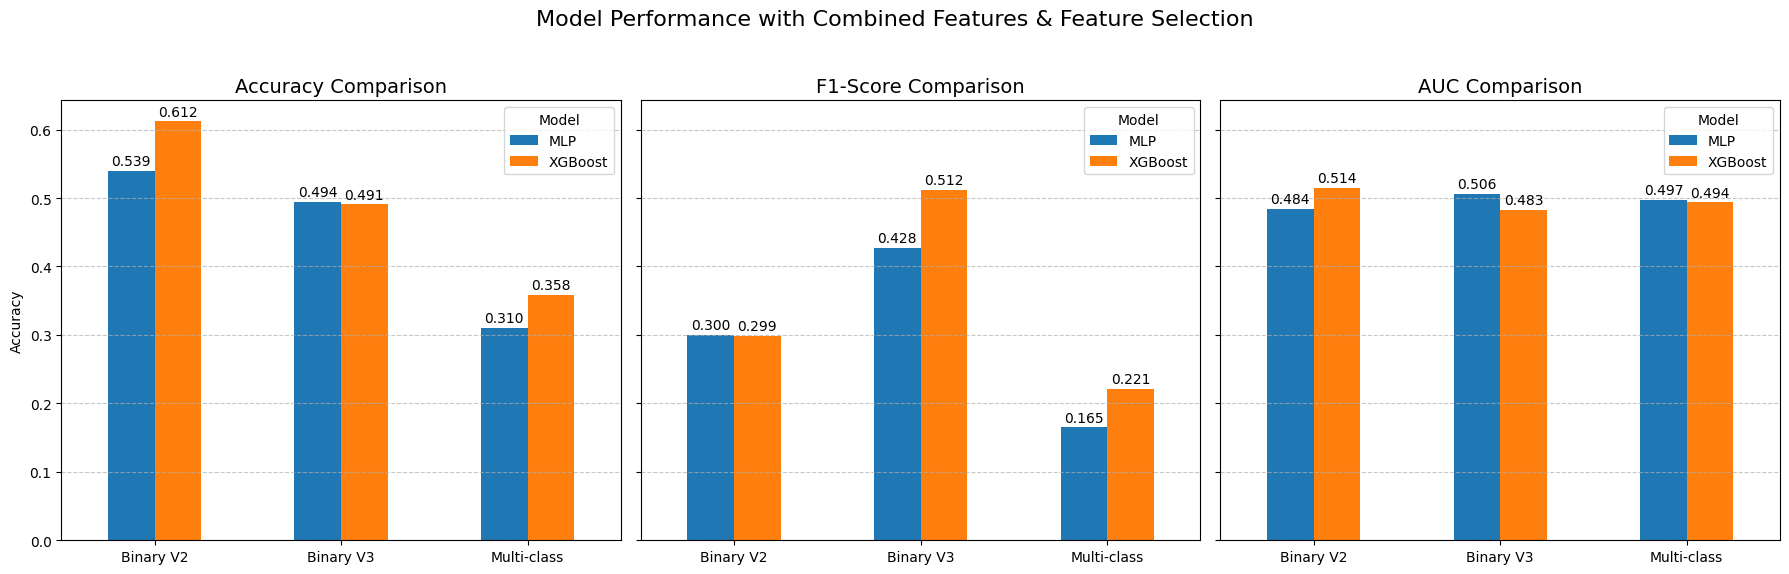

In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
import torch
import torch.nn as nn
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score # <-- 오타 수정 완료
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import copy
import warnings

from rdkit import Chem
from rdkit.Chem import Descriptors
from tqdm import tqdm

# 경고 메시지 무시
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


# --- 사용자 참고 ---
# 사용자가 제공한 원본 df.info() 기반으로 더미 데이터프레임을 생성합니다.
# 실제 final_df를 이 자리에 로드하여 사용하세요.
dummy_smiles = final_df['SMILES']
num_samples = 905 # 실제 데이터 크기와 맞춤
data = {
    'SMILES': np.random.choice(dummy_smiles, num_samples),
    'vDILIConcern': np.random.choice(
        ['Most-concern', 'Less-concern', 'No-concern', 'Ambiguous-concern'],
        num_samples, p=[0.1, 0.2, 0.5, 0.2]
    ),
    'hof': np.random.randn(num_samples) * 10,
    'homo': np.random.randn(num_samples) - 5,
    'lumo': np.random.randn(num_samples) + 1,
    'cosmo_area': [str(x) if np.random.rand() > 0.1 else 'error' for x in np.random.rand(num_samples) * 100],
    'cosmo_volume': [str(x) if np.random.rand() > 0.1 else 'error' for x in np.random.rand(num_samples) * 200],
}
final_df = pd.DataFrame(data)
# 일부러 결측값 생성
final_df.loc[final_df.sample(frac=0.1).index, ['hof', 'homo', 'lumo']] = np.nan

# 이진 분류 타겟 변수 생성
concern_map_v2 = {'Most-concern': 1, 'Less-concern': 1, 'Ambiguous-concern': 0, 'No-concern': 0}
concern_map_v3 = {'Most-concern': 1, 'Less-concern': 1, 'Ambiguous-concern': 1, 'No-concern': 0}
final_df['vDILIConcern_binary'] = final_df['vDILIConcern'].map(concern_map_v2)
final_df['vDILIConcern_binary2'] = final_df['vDILIConcern'].map(concern_map_v3)
# --- 여기까지 ---


# GPU 사용 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. RDKit 2D 디스크립터 생성 함수
def generate_2d_descriptors(smiles_series):
    descriptor_names_2d = [desc[0] for desc in Descriptors._descList]
    all_descriptors = []

    for smi in tqdm(smiles_series, desc="Generating 2D Descriptors"):
        mol = Chem.MolFromSmiles(smi)
        mol_descriptors = {}
        if mol is not None:
            for desc_name in descriptor_names_2d:
                try:
                    mol_descriptors[desc_name] = Descriptors.CalcMolDescriptors(mol)[desc_name]
                except:
                    mol_descriptors[desc_name] = None
        all_descriptors.append(mol_descriptors)

    return pd.DataFrame(all_descriptors, index=smiles_series.index)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size=30, output_size=4):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64), nn.BatchNorm1d(64), nn.LeakyReLU(), nn.Dropout(0.5),
            nn.Linear(64, 32), nn.BatchNorm1d(32), nn.LeakyReLU(), nn.Dropout(0.5),
            nn.Linear(32, output_size)
        )
    def forward(self, x): return self.network(x)

# MLP 학습 함수
def train_mlp_model(X_train, y_train, X_val, y_val, class_weights_tensor, num_features, num_classes):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

    model = MLP(input_size=num_features, output_size=num_classes).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)

    best_val_loss = float('inf'); patience_counter = 0; best_model_state = None

    for epoch in range(200):
        model.train()
        optimizer.zero_grad(); outputs = model(X_train_tensor); loss = criterion(outputs, y_train_tensor)
        loss.backward(); optimizer.step()

        model.eval()
        with torch.no_grad(): val_loss = criterion(model(X_val_tensor), y_val_tensor)
        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss; patience_counter = 0; best_model_state = copy.deepcopy(model.state_dict())
        else:
            patience_counter += 1
            if patience_counter >= 20: break

    if best_model_state:
        model.load_state_dict(best_model_state)
    return model

# 교차 검증 파이프라인
def run_experiment(X, y, task_name, model_type, num_features_to_select=30):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = {'accuracy': [], 'f1': [], 'auc': []}
    num_classes = len(np.unique(y))

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', MinMaxScaler()),
            ('selector', SelectKBest(f_classif, k=min(num_features_to_select, X_train_fold.shape[1])))
        ])

        X_train_fold = pipeline.fit_transform(X_train_fold, y_train_fold)
        X_test_fold = pipeline.transform(X_test_fold)

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train_fold), y=y_train_fold)

        if model_type == 'XGBoost':
            model_xgb = xgb.XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')
            model = model_xgb
            if task_name != 'Multi-class':
                scale_pos_weight = class_weights[1] / class_weights[0]
                model.set_params(scale_pos_weight=scale_pos_weight)
            model.fit(X_train_fold, y_train_fold)

        elif model_type == 'MLP':
            X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_fold, y_train_fold, test_size=0.2, random_state=42, stratify=y_train_fold)
            class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
            model = train_mlp_model(X_train_sub, y_train_sub, X_val, y_val, class_weights_tensor, X_train_fold.shape[1], num_classes)

        if model_type == 'XGBoost':
            y_pred_proba = model.predict_proba(X_test_fold)
        else: # MLP
            model.eval()
            with torch.no_grad():
                outputs = model(torch.tensor(X_test_fold, dtype=torch.float32).to(device))
                y_pred_proba = torch.softmax(outputs, dim=1).cpu().numpy()
        y_pred = np.argmax(y_pred_proba, axis=1)

        scores['accuracy'].append(accuracy_score(y_test_fold, y_pred))
        if task_name == 'Multi-class':
            scores['f1'].append(f1_score(y_test_fold, y_pred, average='macro', zero_division=0))
            scores['auc'].append(roc_auc_score(y_test_fold, y_pred_proba, multi_class='ovr', average='macro'))
        else:
            scores['f1'].append(f1_score(y_test_fold, y_pred, average='binary', zero_division=0))
            scores['auc'].append(roc_auc_score(y_test_fold, y_pred_proba[:, 1]))

    return np.mean(scores['accuracy']), np.mean(scores['f1']), np.mean(scores['auc'])

# --- 메인 실행 로직 ---

# Step 1: 기존 QM 특징들의 데이터 타입을 숫자로 안전하게 변환
print("Step 1: Safely preprocessing original QM features...")
qm_features_df = final_df[['hof', 'cosmo_area', 'cosmo_volume', 'homo', 'lumo']].copy()
for col in qm_features_df.columns:
    qm_features_df[col] = pd.to_numeric(qm_features_df[col], errors='coerce')

# Step 2: RDKit 2D 디스크립터 생성
print("Step 2: Generating 2D molecular descriptors...")
rdkit_features_df = generate_2d_descriptors(final_df['SMILES'])

# Step 3: QM 특징과 RDKit 특징 결합
print("Step 3: Combining QM and RDKit features...")
X_combined = pd.concat([qm_features_df, rdkit_features_df], axis=1)
X_combined.columns = [f"feat_{i}" for i in range(X_combined.shape[1])]

print(f"\nTotal combined features: {X_combined.shape[1]}")

# Step 4: 모델 학습 및 평가
results = {'Task': [], 'Model': [], 'Accuracy': [], 'F1-Score': [], 'AUC': []}
tasks = {
    "Multi-class": (pd.factorize(final_df['vDILIConcern'])[0]),
    "Binary V2": final_df['vDILIConcern_binary'].values,
    "Binary V3": final_df['vDILIConcern_binary2'].values
}

X = X_combined.values

for task_name, y in tasks.items():
    print(f"\nProcessing Task: {task_name}...")
    valid_indices = ~np.isnan(y)
    X_task, y_task = X[valid_indices], y[valid_indices]

    if len(y_task) == 0:
        print(f"  - Skipping task {task_name} due to no valid target values.")
        continue

    for model_type in ['XGBoost', 'MLP']:
        print(f"  - Training {model_type}...")
        acc, f1, auc = run_experiment(X_task, y_task, task_name, model_type, num_features_to_select=30)
        results['Task'].append(task_name); results['Model'].append(model_type)
        results['Accuracy'].append(acc); results['F1-Score'].append(f1); results['AUC'].append(auc)

results_df = pd.DataFrame(results)
print("\n=== 최종 모델 성능 비교 (QM + RDKit 특징 결합 및 선택 후) ===")
print(results_df)

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ['Accuracy', 'F1-Score', 'AUC']
for i, metric in enumerate(metrics):
    pivot_df = results_df.pivot_table(index='Task', columns='Model', values=metric)
    pivot_df.plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f'{metric} Comparison', fontsize=14); axes[i].set_ylabel(metric); axes[i].set_xlabel('')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    for container in axes[i].containers: axes[i].bar_label(container, fmt='%.3f', label_type='edge', padding=2)
plt.suptitle('Model Performance with Combined Features & Feature Selection', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()